In [1]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as mpe
from visualize_graphs import *
import numpy as np
from CompilerQC import paths
import matplotlib.patches as patches
import matplotlib.patheffects as mpe

from scipy.special import binom
import matplotlib.colors as mcolors
import matplotlib.cm as cm


from shapely.geometry import Polygon
from itertools import combinations
from CompilerQC import *
import random
import matplotlib



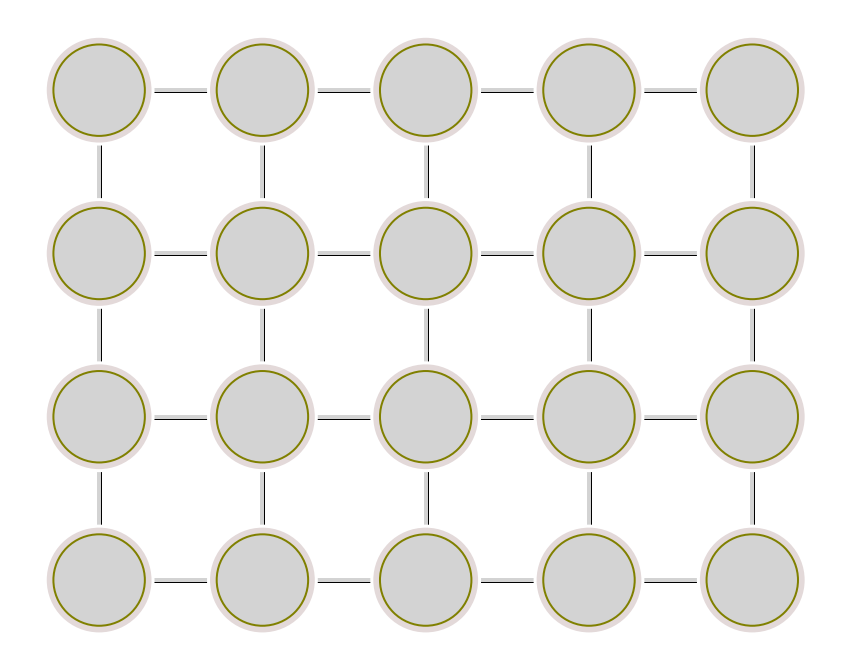

In [114]:
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(i, j) for i in range(5) for j in range(4)]):
    circles.add_circle(Circle(coord=(i, j), fontsize=40))
    
forbidden_edges = [((0, 3), (1, 2)),
((0, 2), (1, 3)),
((0, 1), (1, 0)),
((0, 0), (1, 1)),
((1, 1), (2, 2)),
((1, 2), (2, 1)),
((2, 3), (3, 2)),
((2, 2), (3, 3)),
((2, 1), (3, 0)),
((2, 0), (3, 1)),
((3, 2), (4, 1)),
((3, 1), (4, 2)),]

forbidden_edges = []

for edge in list(combinations(circles.coords, 2)):
    if random.random() < 0.3:
        pass#continue
    if (np.abs(np.subtract(*edge)).sum()) <= 1.1:
        if edge not in forbidden_edges:
            edges.add_edge(Edge(edge=edge))

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 4
    edge.edgewidth= 5
    edge.alpha=0.1

    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])
    
    
for circle in circles:
    circle.size=0.28
    circle.linewidth = 2
    circle.edgecolor = "olive"
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=3,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)

plt.savefig(paths.plots / "Figures/grid_connectivity.pdf")
plt.savefig(paths.plots / "Figures/pngs/grid_connectivity.png")

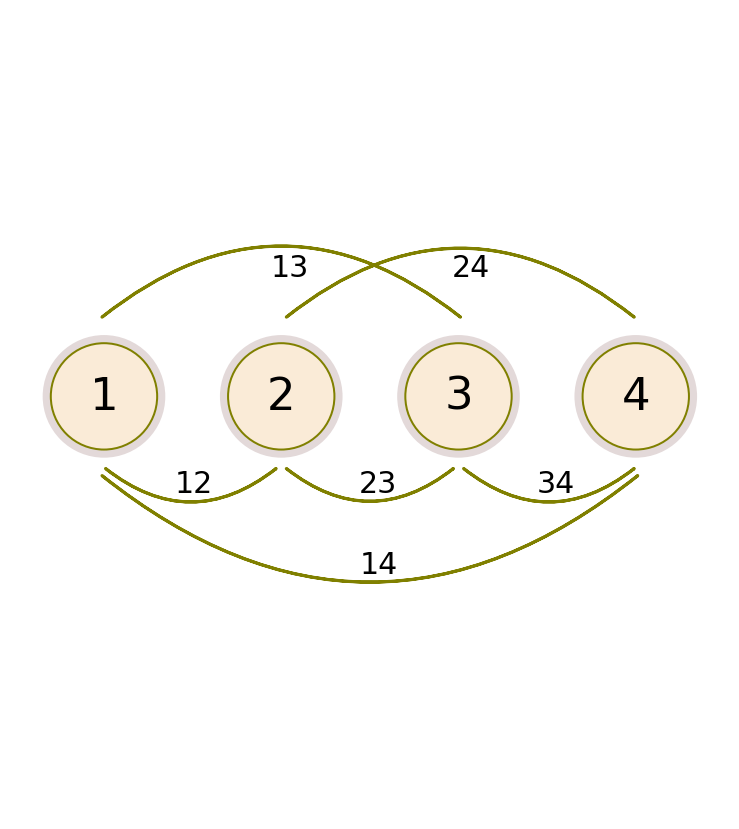

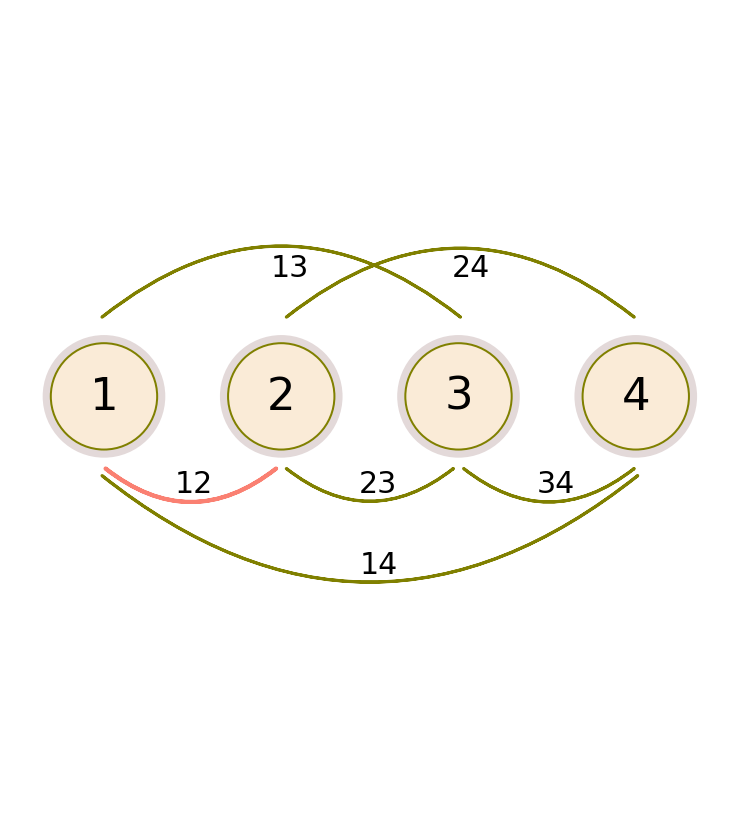

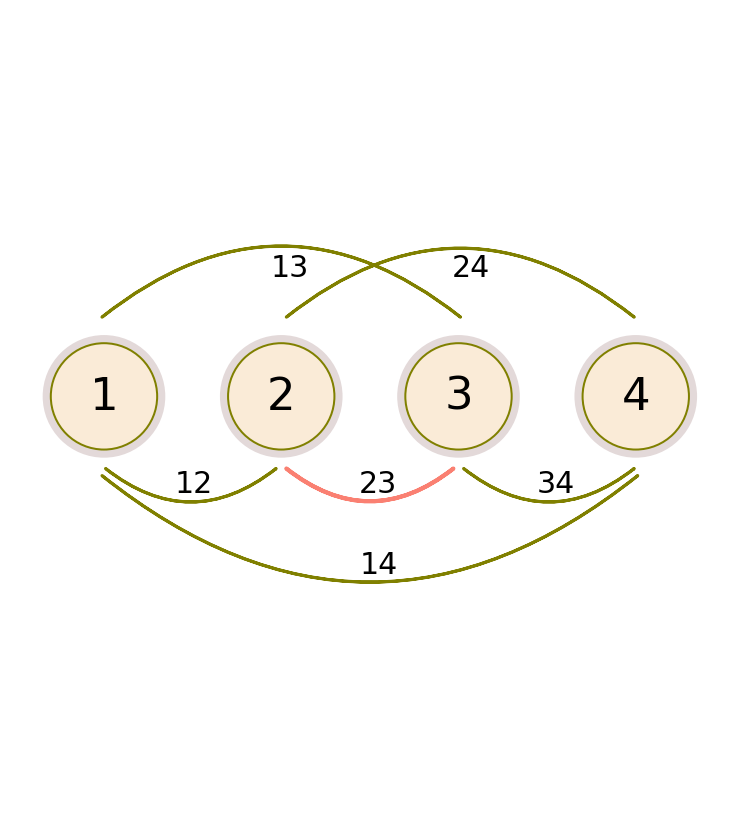

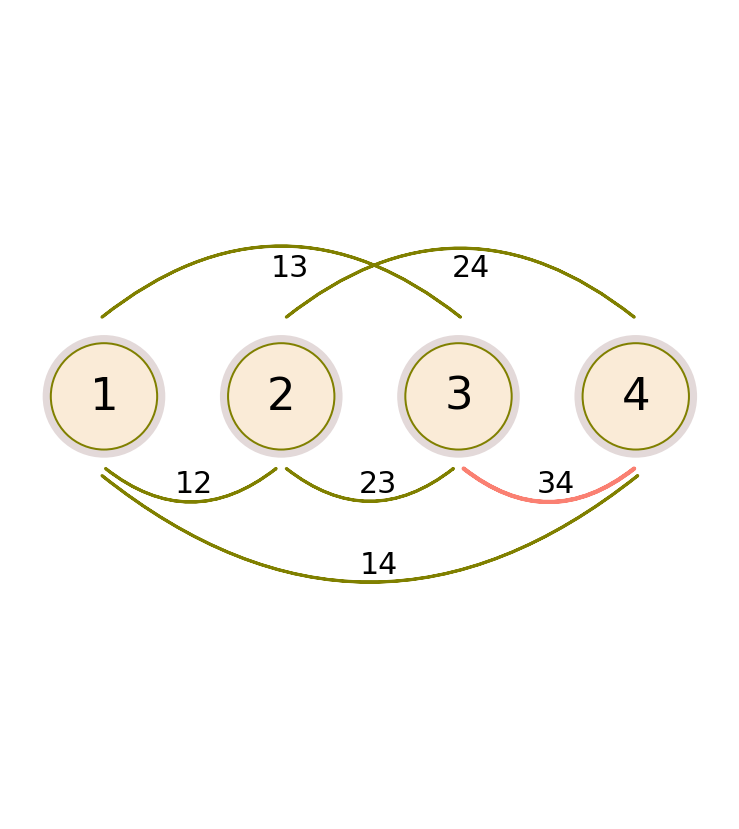

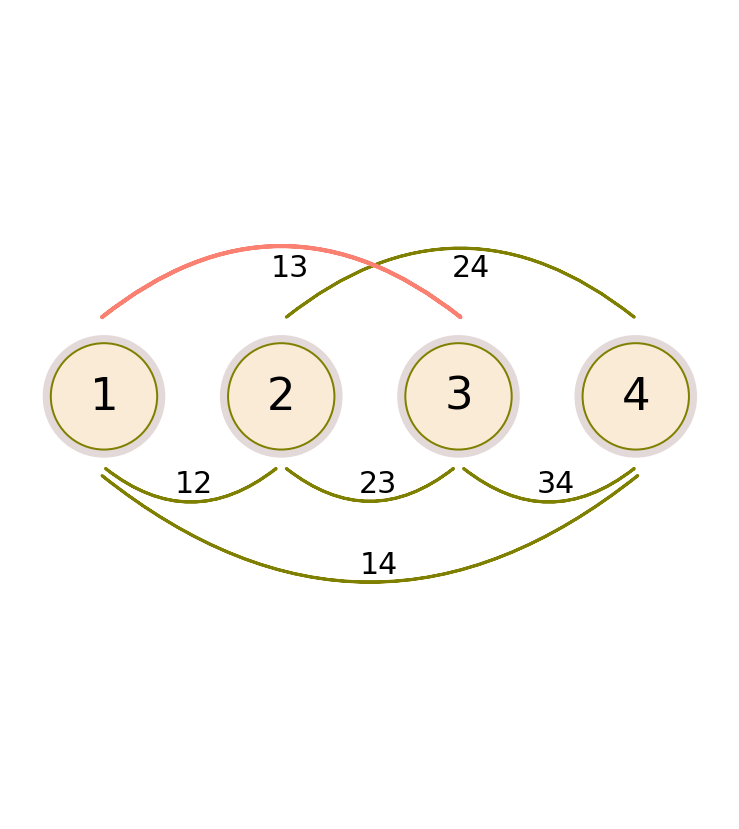

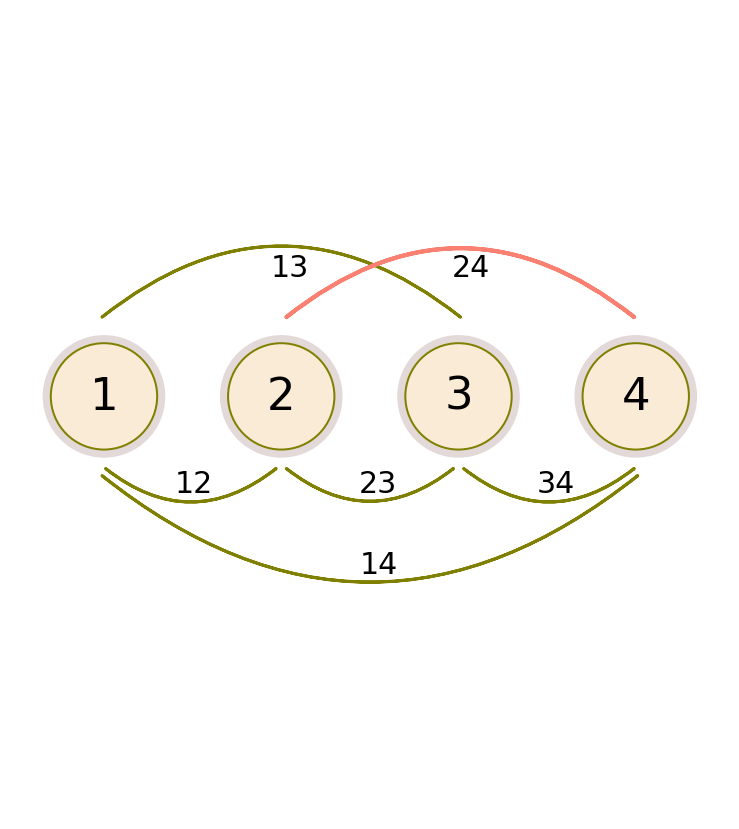

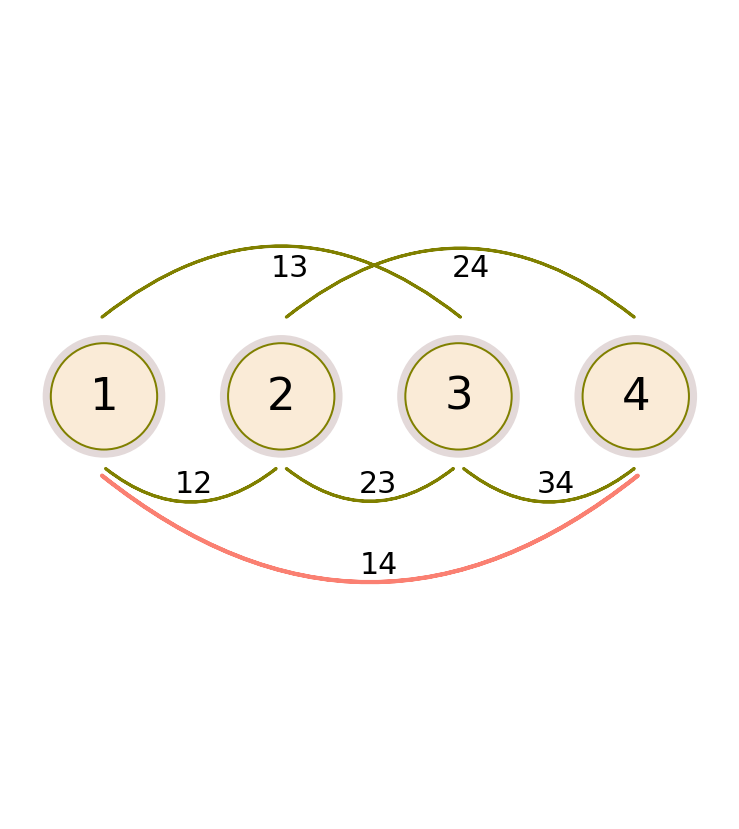

In [41]:
from copy import copy
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1.5, 0),
            color="antiquewhite",
            name=4,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))

    
list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),
patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),
patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=3,connectionstyle="arc3,rad=-.4", zorder=39, color='olive'),
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=3,connectionstyle="arc3,rad=-.4", zorder=39, color='olive'),
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
    ]

new_color = 'salmon'
new_lw = 4
new_list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=0,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),

patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),
patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),
patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color=new_color),
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color=new_color),
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color)
    ]

for idx, new_patch in enumerate(new_list_of_patches):
    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)
    for patch in list_of_patches:
        patch = copy(patch)
        ax.add_patch(patch)
    ax.add_patch(new_patch)
    for circle in circles:

        if circle.name is not None:
            label = ax.annotate(
                r"{}".format(circle.name),
                xy= (circle.coord[0], circle.coord[1]),
                ha="center",
                va="center",
                fontsize=45,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        patch = copy(patch)
        ax.add_patch(patch)

        ax.add_patch(circle.patch)

    ax.text(.2, -.27, '12',fontsize=30)
    ax.text(.72, -.27, '23',fontsize=30)
    ax.text(1.22, -.27, '34',fontsize=30)
    ax.text(.47, .34, '13',fontsize=30)
    ax.text(.98, .34, '24',fontsize=30)
    ax.text(.72, -.5, '14',fontsize=30)
    
    ax.figure.savefig(paths.plots / f"Figures/N_4_nice_spin_glass_marked_edge_{idx}.pdf")
    ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_nice_spin_glass_marked_edge_{idx}.png")


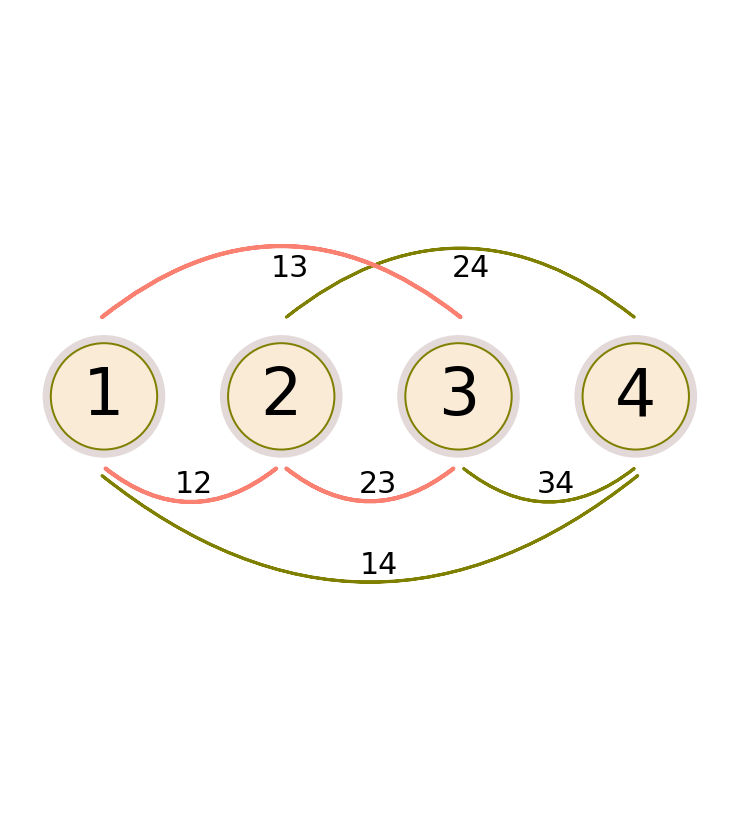

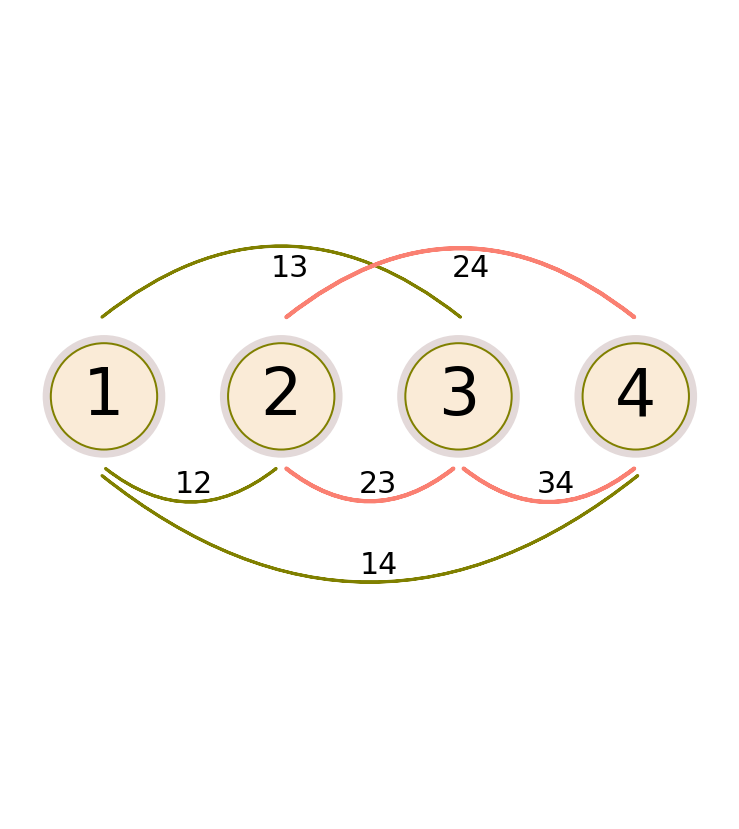

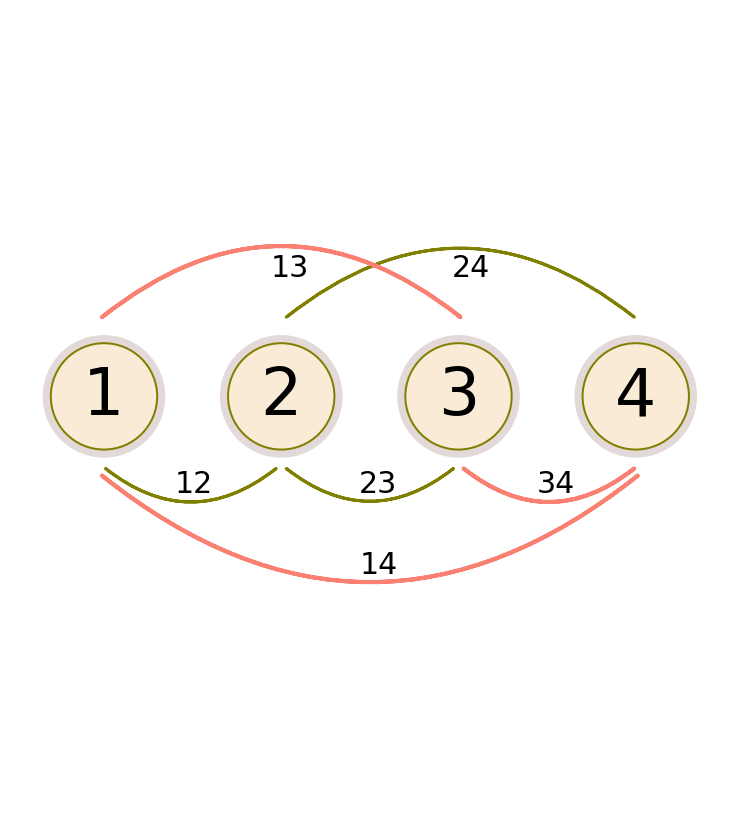

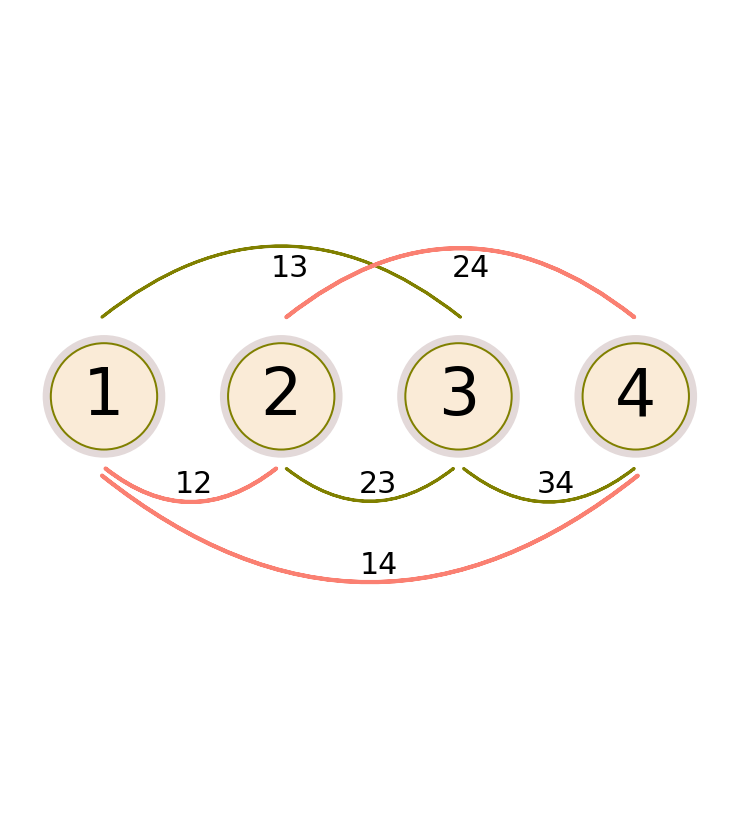

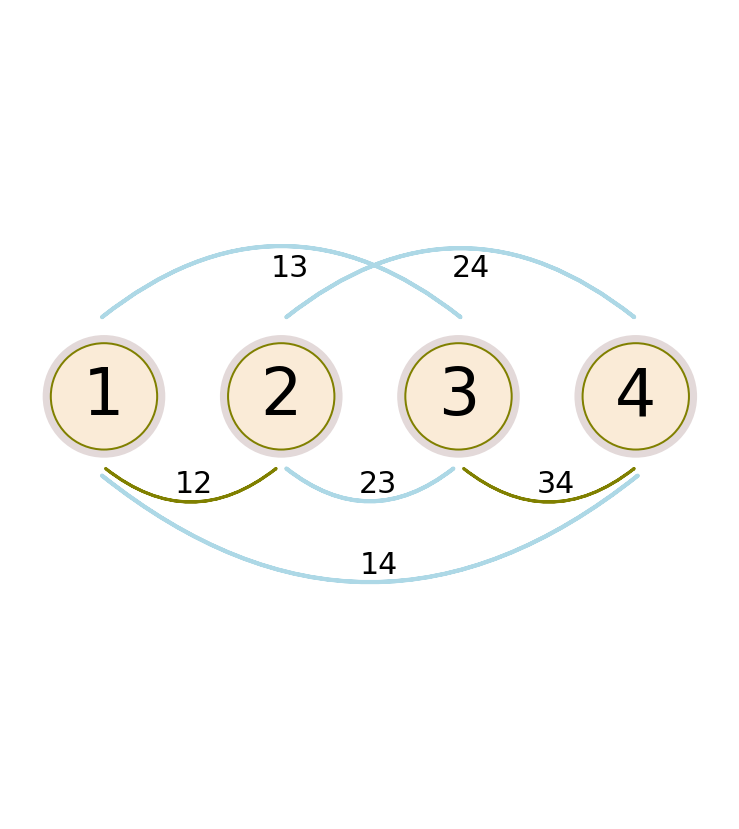

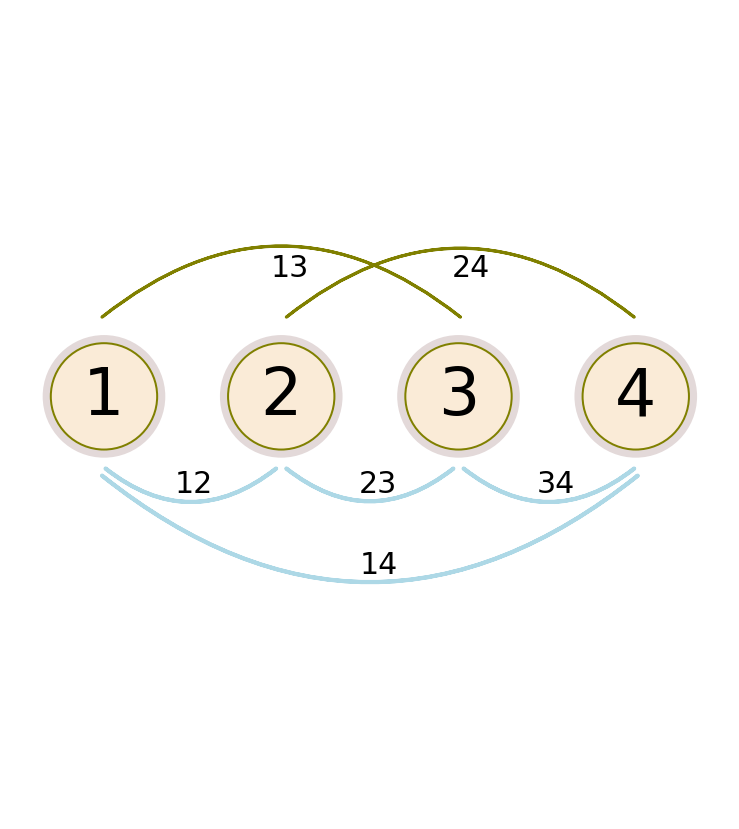

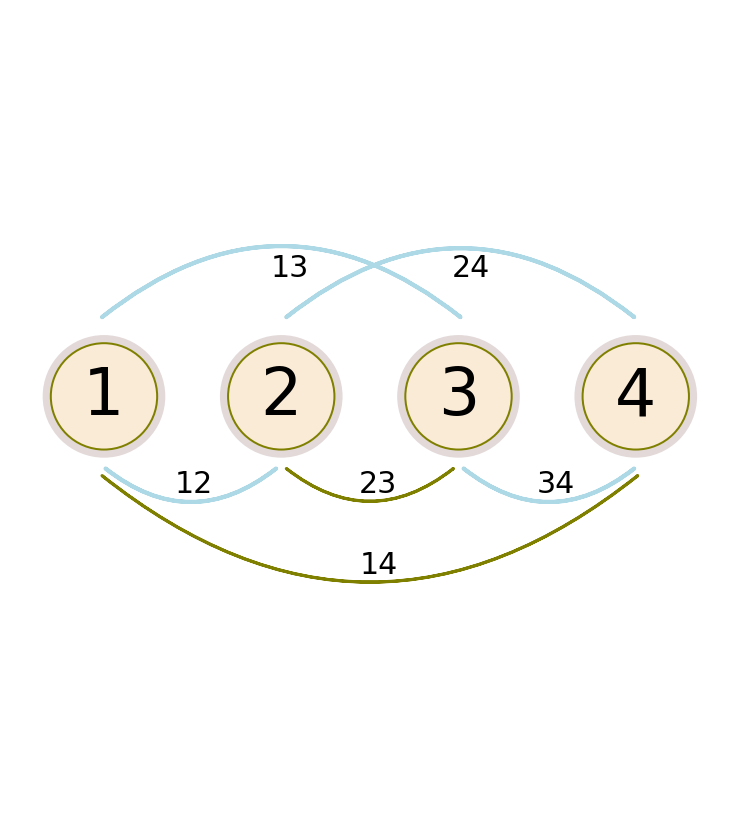

In [44]:
from copy import copy
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1.5, 0),
            color="antiquewhite",
            name=4,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))

    
list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),
patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),
patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive'),
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=3,connectionstyle="arc3,rad=-.4", zorder=39, color='olive'),
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=3,connectionstyle="arc3,rad=-.4", zorder=39, color='olive'),
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color='olive')
    ]

new_color = 'salmon'
new_lw = 4
new_list_of_patches = [
[patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),#12
patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),#23
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color=new_color),],#13
    
[patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),#23
patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),#34
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color=new_color),],#24
    
[patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),#34
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color=new_color),#13
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color)],#14

[patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color),#12
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color=new_color),#24
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color=new_color)],#14
    
[patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#23
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color="lightblue"),#13
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color="lightblue"),#24
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue")],#14
    
[
patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#12
patches.FancyArrowPatch((-.01, -.22), (1.51, -.22),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#14
patches.FancyArrowPatch((.51, -.2), (.99, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#23
patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#34
],
[
patches.FancyArrowPatch((0, -.2), (.49, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#12
patches.FancyArrowPatch((-.01, .22), (1.01, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color="lightblue"),#13
patches.FancyArrowPatch((.51, .22), (1.5, .22),lw=new_lw,connectionstyle="arc3,rad=-.4", zorder=39, color="lightblue"),#24
patches.FancyArrowPatch((1.01, -.2), (1.5, -.2),lw=new_lw,connectionstyle="arc3,rad=.4", zorder=39, color="lightblue"),#34
]]
for idx, new_patchs in enumerate(new_list_of_patches):

    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)
    for patch in list_of_patches:
        patch = copy(patch)
        ax.add_patch(patch)
    for new_patch in new_patchs:
        ax.add_patch(new_patch)
    for circle in circles:

        if circle.name is not None:
            label = ax.annotate(
                r"{}".format(circle.name),
                xy= (circle.coord[0], circle.coord[1]),
                ha="center",
                va="center",
                fontsize=65,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        patch = copy(patch)
        ax.add_patch(patch)

        ax.add_patch(circle.patch)

    ax.text(.2, -.27, '12',fontsize=30)
    ax.text(.72, -.27, '23',fontsize=30)
    ax.text(1.22, -.27, '34',fontsize=30)
    ax.text(.47, .34, '13',fontsize=30)
    ax.text(.98, .34, '24',fontsize=30)
    ax.text(.72, -.5, '14',fontsize=30)
    
    ax.figure.savefig(paths.plots / f"Figures/N_4_nice_spin_glass_loop_{idx}.pdf")
    ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_nice_spin_glass_loop_{idx}.png")


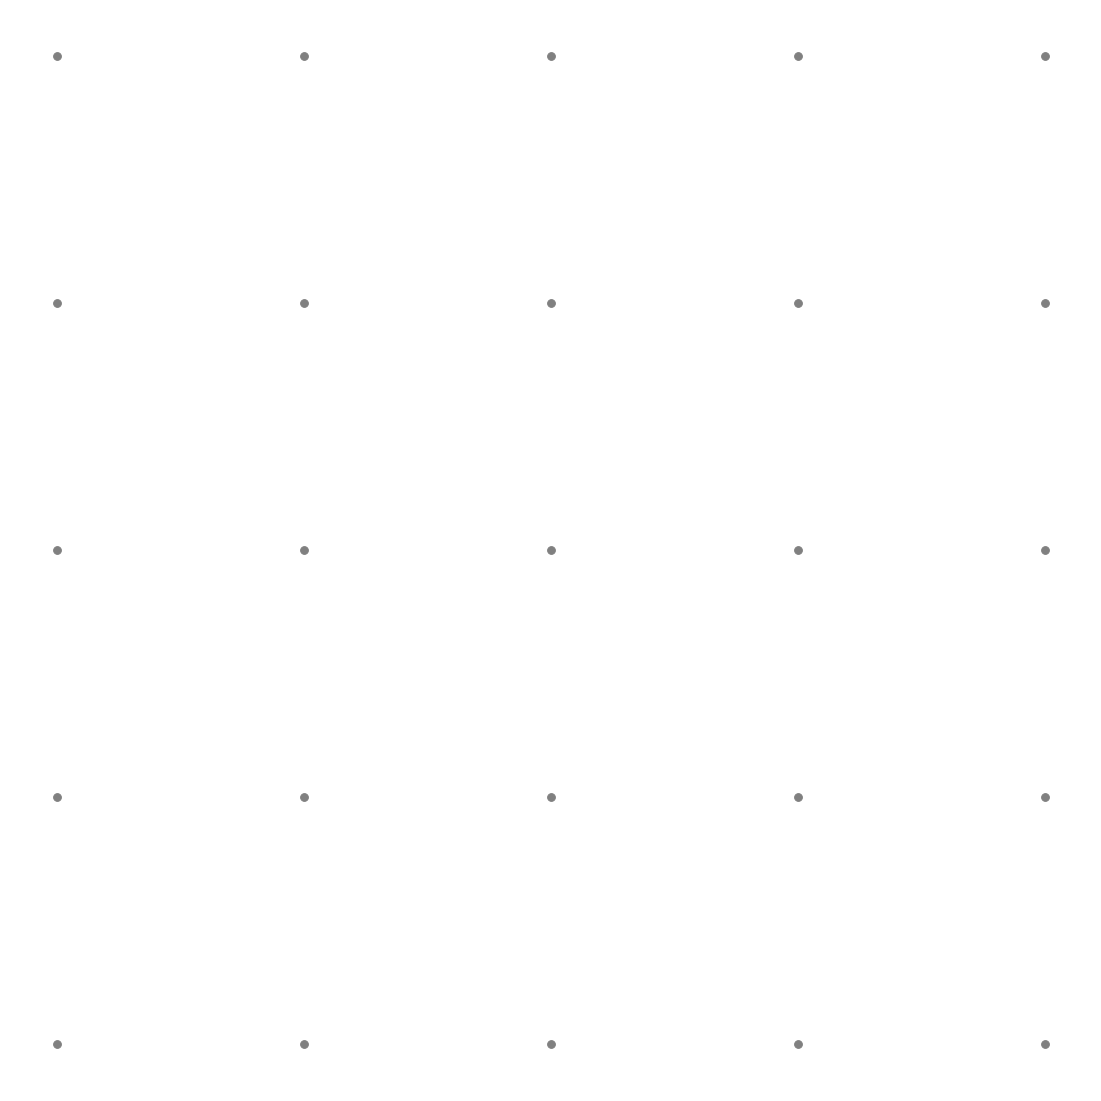

In [187]:
color_of_grid_points="grey"
alpha_of_grid_points=1
padding=1
s=0.6
_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=60, alpha=alpha_of_grid_points)
ax.figure.savefig(paths.plots / f"Figures/pngs/grid_points_empty.png")


(1, 2)
(1, 3)
(1, 4)
(2, 4)
(2, 3)
(3, 4)


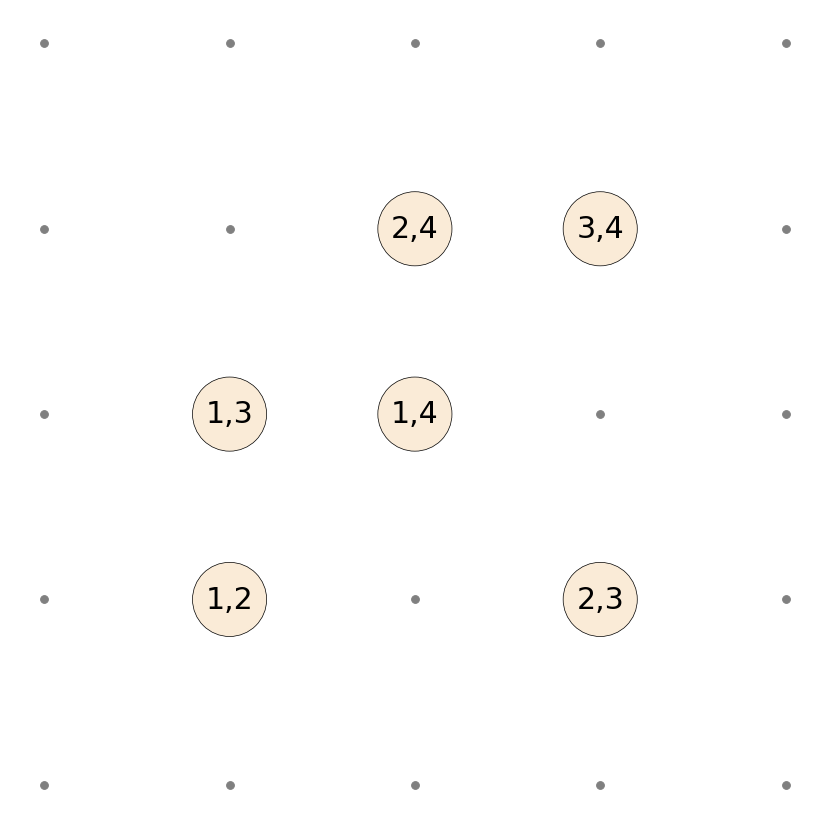

In [199]:
qubit_to_coord_dict = {
    (1, 2): (0, 0),
    (1, 3): (0, 1),
    (1, 4): (1, 1),
    (2, 4): (1, 2),
    (2, 3): (2, 0),
    (3, 4): (2, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
fig, ax = plt.subplots(figsize=(15, 15))

graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
#ax = polygon_object.visualize()


self=polygon_object
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
color_of_grid_points="grey"
alpha_of_grid_points=1
padding=1
s=0.6
without_label=False
if ax is None: _, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=60, alpha=alpha_of_grid_points)

for qbit in self.nodes_object.qbits:
    print(qbit.qubit)
    coord = qbit.coord
    fontsize = 30
    label_text = ""
    if not without_label:
        label_text = r"{},{}".format(*qbit.qubit)
    label = ax.annotate(
        label_text,
        xy=coord,
        ha="center",
        va="center",
        fontsize=fontsize,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    ax.add_patch(circle)

    ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_qbits_on_grid_0_with_qbit_{qbit.qubit}.png")


/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


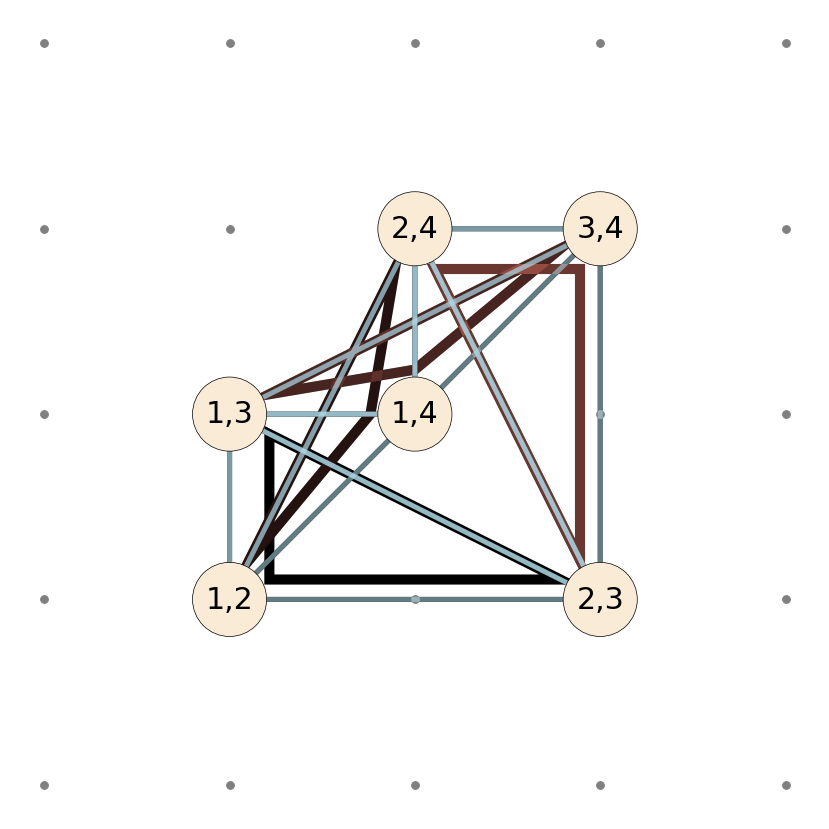

In [71]:
qubit_to_coord_dict = {
    (1, 2): (0, 0),
    (1, 3): (0, 1),
    (1, 4): (1, 1),
    (2, 4): (1, 2),
    (2, 3): (2, 0),
    (3, 4): (2, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
fig, ax = plt.subplots(figsize=(15, 15))

graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
#ax = polygon_object.visualize()


self=polygon_object
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
color_of_grid_points="grey"
alpha_of_grid_points=1
padding=1
s=0.6
without_label=False
if ax is None: _, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=60, alpha=alpha_of_grid_points)

# if core_corner is not None:
#     (min_x, max_x), (min_y, max_y) = core_corner
#     envelop = [Polygons.rotate_coords_by_45(p, rotate) 
#                for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
#     patch = plt.Polygon(
#         envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
#     )
#     ax.add_patch(patch)
self.polygons = [[(1, 2), (2, 3), (1, 3)],
 [(1, 2), (2, 4), (1, 4)],
 [(1, 3), (3, 4), (1, 4)],
 [(2, 3), (3, 4), (2, 4)],
 [(1, 2), (2, 3), (3, 4), (1, 4)],
 [(1, 2), (2, 4), (3, 4), (1, 3)],
 [(1, 3), (2, 3), (2, 4), (1, 4)]]
# color plaquettes
for idx, polygon in enumerate(self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
)):  
    fill, facecolor, lw, alpha, edge_alpha = False, 'lightblue', 5, 1, 0

    if len(polygon) != 4:
        fill, facecolor, lw, alpha, edge_alpha = False, 'salmon', 10, 1, 0

        polygon = Polygons.scale(polygon, 1.2*radius)
    polygon = [Polygons.rotate_coords_by_45(p, rotate)
               for p in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=10,
        fill=False,
        lw=lw,
        edgecolor=facecolor,
        alpha=idx/7,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw+.1,
        edgecolor="black",
        alpha=1
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    coord = qbit.coord
    fontsize = 30
    label_text = ""
    if not without_label:
        label_text = r"{},{}".format(*qbit.qubit)
    label = ax.annotate(
        label_text,
        xy=coord,
        ha="center",
        va="center",
        fontsize=fontsize,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    ax.add_patch(circle)

ax.figure.savefig(paths.plots / f"Figures/N_4_qbits_on_grid_0.pdf")
ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_qbits_on_grid_0.png")


/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


False
False
True
False
False
False
False


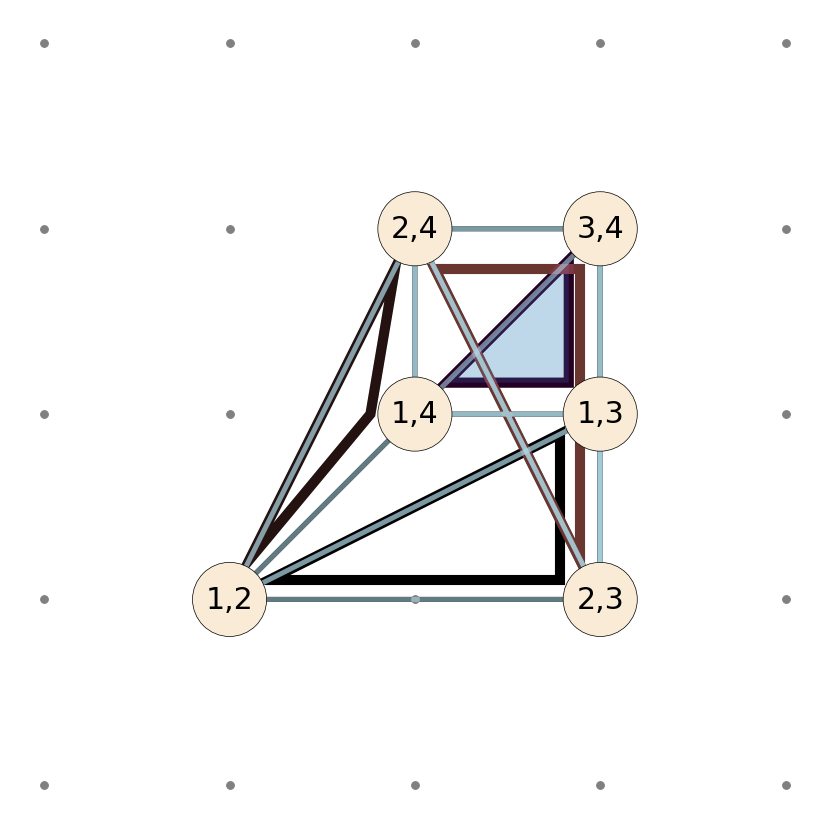

In [72]:
qubit_to_coord_dict = {
    (1, 2): (0, 0),
    (1, 3): (2, 1),
    (1, 4): (1, 1),
    (2, 4): (1, 2),
    (2, 3): (2, 0),
    (3, 4): (2, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
fig, ax = plt.subplots(figsize=(15, 15))

graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
#ax = polygon_object.visualize()


self=polygon_object
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
color_of_grid_points="grey"
alpha_of_grid_points=1
padding=1
s=0.6
without_label=False
if ax is None: _, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=60, alpha=alpha_of_grid_points)

# if core_corner is not None:
#     (min_x, max_x), (min_y, max_y) = core_corner
#     envelop = [Polygons.rotate_coords_by_45(p, rotate) 
#                for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
#     patch = plt.Polygon(
#         envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
#     )
#     ax.add_patch(patch)
self.polygons = [[(1, 2), (2, 3), (1, 3)],
 [(1, 2), (2, 4), (1, 4)],
 [(1, 3), (3, 4), (1, 4)],
 [(2, 3), (3, 4), (2, 4)],
 [(1, 2), (2, 3), (3, 4), (1, 4)],
 [(1, 2), (2, 4), (3, 4), (1, 3)],
 [(1, 3), (2, 3), (2, 4), (1, 4)]]
# color plaquettes
for idx, polygon in enumerate(self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
)):  
    fill, facecolor, lw, alpha, edge_alpha = False, 'lightblue', 5, 1, 0
    
    if len(polygon) != 4:
        fill, facecolor, lw, alpha, edge_alpha = False, 'salmon', 10, 1, 0

    if polygon_object.scope_of_polygon(polygon_coord=polygon) == polygon_object.unit_triangle:
        fill = True
        facecolor='purple'
    if len(polygon) != 4:
        polygon = Polygons.scale(polygon, 1.2*radius)
    polygon = [Polygons.rotate_coords_by_45(p, rotate)
               for p in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=10,
        fill=fill,
        lw=lw,
        edgecolor=facecolor,
        alpha=idx/7,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw+.1,
        edgecolor="black",
        alpha=1
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    coord = qbit.coord
    fontsize = 30
    label_text = ""
    if not without_label:
        label_text = r"{},{}".format(*qbit.qubit)
    label = ax.annotate(
        label_text,
        xy=coord,
        ha="center",
        va="center",
        fontsize=fontsize,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    ax.add_patch(circle)

    
ax.figure.savefig(paths.plots / f"Figures/N_4_qbits_on_grid_1.pdf")
ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_qbits_on_grid_1.png")


/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


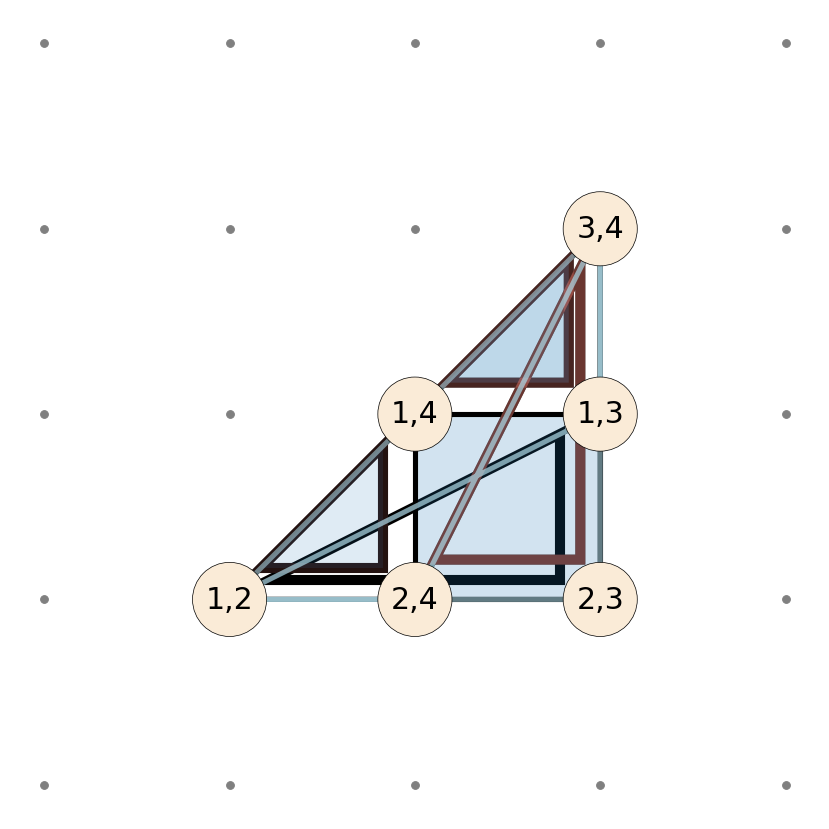

In [79]:
qubit_to_coord_dict = {
    (1, 2): (0, 0),
    (1, 3): (2, 1),
    (1, 4): (1, 1),
    (2, 4): (1, 0),
    (2, 3): (2, 0),
    (3, 4): (2, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
fig, ax = plt.subplots(figsize=(15, 15))

graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
#ax = polygon_object.visualize()


self=polygon_object
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
color_of_grid_points="grey"
alpha_of_grid_points=1
padding=1
s=0.6
without_label=False
if ax is None: _, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=60, alpha=alpha_of_grid_points)

# if core_corner is not None:
#     (min_x, max_x), (min_y, max_y) = core_corner
#     envelop = [Polygons.rotate_coords_by_45(p, rotate) 
#                for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
#     patch = plt.Polygon(
#         envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
#     )
#     ax.add_patch(patch)
self.polygons = [[(1, 2), (2, 3), (1, 3)],
 [(1, 2), (2, 4), (1, 4)],
 [(1, 3), (3, 4), (1, 4)],
 [(2, 3), (3, 4), (2, 4)],
 [(1, 2), (2, 3), (3, 4), (1, 4)],
 [(1, 2), (2, 4), (3, 4), (1, 3)],
 [(1, 3), (2, 3), (2, 4), (1, 4)]]
# color plaquettes
for idx, polygon in enumerate(self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
)):  
    fill, facecolor, lw, alpha, edge_alpha = False, 'lightblue', 5, 1, 0
    zorder = 10
    if len(polygon) != 4:
        fill, facecolor, lw, alpha, edge_alpha = False, 'salmon', 10, 1, 0
    alpha = idx/7

    if polygon_object.scope_of_polygon(polygon_coord=polygon) == polygon_object.unit_triangle:
        fill = True
    if polygon_object.scope_of_polygon(polygon_coord=polygon) == polygon_object.unit_square:
        fill = True
        zorder=0
        alpha = 0.2
    if len(polygon) != 4:
        polygon = Polygons.scale(polygon, 1.2*radius)
    polygon = [Polygons.rotate_coords_by_45(p, rotate)
               for p in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=zorder,
        fill=fill,
        lw=lw,
        edgecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw+.1,
        edgecolor="black",
        alpha=1
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    coord = qbit.coord
    fontsize = 30
    label_text = ""
    if not without_label:
        label_text = r"{},{}".format(*qbit.qubit)
    label = ax.annotate(
        label_text,
        xy=coord,
        ha="center",
        va="center",
        fontsize=fontsize,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    ax.add_patch(circle)

    
ax.figure.savefig(paths.plots / f"Figures/N_4_qbits_on_grid_2.pdf")
ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_qbits_on_grid_2.png")

/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


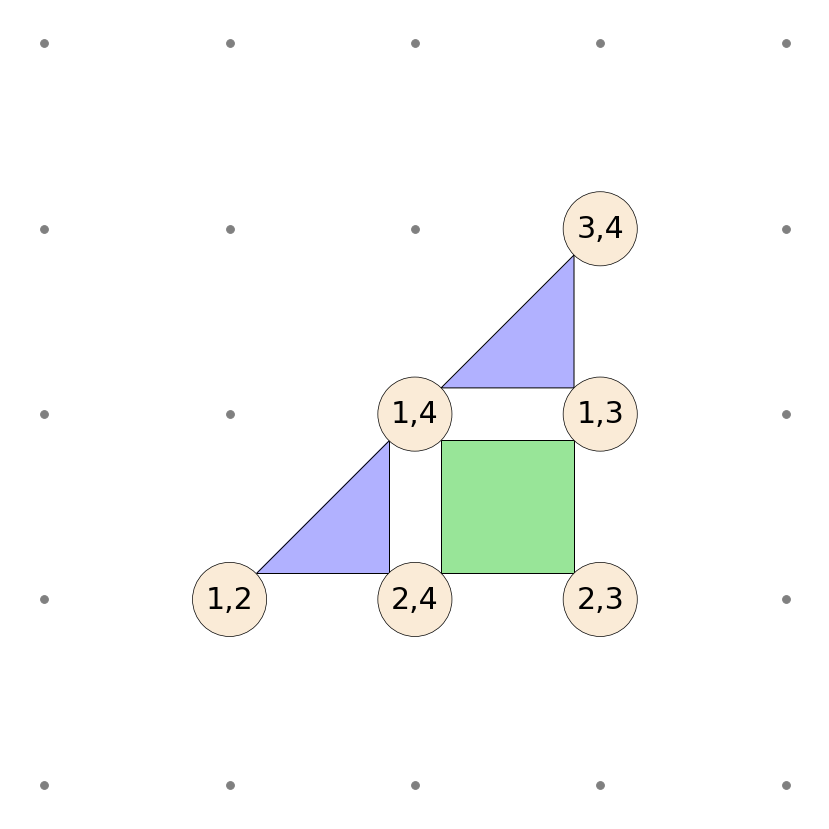

In [50]:
qubit_to_coord_dict = {
    (1, 2): (0, 0),
    (1, 3): (2, 1),
    (1, 4): (1, 1),
    (2, 4): (1, 0),
    (2, 3): (2, 0),
    (3, 4): (2, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
fig, ax = plt.subplots(figsize=(15, 15))

graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
#ax = polygon_object.visualize()


self=polygon_object
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
corner_lw=10
color_of_grid_points="grey"
alpha_of_grid_points=1
padding=1
s=0.6
without_label=False
if ax is None: _, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=60, alpha=alpha_of_grid_points)

# if core_corner is not None:
#     (min_x, max_x), (min_y, max_y) = core_corner
#     envelop = [Polygons.rotate_coords_by_45(p, rotate) 
#                for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
#     patch = plt.Polygon(
#         envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
#     )
#     ax.add_patch(patch)
self.polygons  = [[(1, 2), (2, 3), (1, 3)],
 [(1, 2), (2, 4), (1, 4)],
 [(1, 3), (3, 4), (1, 4)],
 [(2, 3), (3, 4), (2, 4)],
 [(1, 2), (2, 3), (3, 4), (1, 4)],
 [(1, 2), (2, 4), (3, 4), (1, 3)],
 [(1, 3), (2, 3), (2, 4), (1, 4)]]
# color plaquettes
for idx, polygon in enumerate(self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
)):  
        # if center is part of polygon, error will be thrown
        if Polygons.center_of_coords(polygon) in polygon:
            continue
        fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
        if self.scope_measure:
            measure = self.scope_of_polygon(polygon)
        if not self.scope_measure:
            measure = self.moment_of_inertia(polygon)
        if measure == self.unit_square:
            fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.5, 1
            polygon = Polygons.scale(polygon, radius)
        if measure == self.unit_triangle:
            fill, facecolor, lw, alpha, edge_alpha = True, "blue", 1, 0.3, 1
            polygon = Polygons.scale(polygon, radius)
        # if points are on a line, it is not a polygon anymore but a LineString object
        try: polygon = list(zip(*MultiPoint(polygon).convex_hull.exterior.xy))
        except: pass
        polygon = [Polygons.rotate_coords_by_45(p, rotate)
                   for p in polygon]
        patch = plt.Polygon(
            polygon,
            zorder=10,
            fill=fill,
            lw=0,
            facecolor=facecolor,
            alpha=alpha,
        )
        edge = plt.Polygon(
            polygon,
            zorder=10,
            fill=False,
            lw=lw,
            edgecolor="black",
            alpha=edge_alpha
        )
        ax.add_patch(patch)
        ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    coord = qbit.coord
    fontsize = 30
    label_text = ""
    if not without_label:
        label_text = r"{},{}".format(*qbit.qubit)
    label = ax.annotate(
        label_text,
        xy=coord,
        ha="center",
        va="center",
        fontsize=fontsize,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    ax.add_patch(circle)

    
ax.figure.savefig(paths.plots / f"Figures/N_4_qbits_on_grid_3.pdf")
ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_qbits_on_grid_3.png")

In [49]:
Graph.complete(4)
e = functions_for_benchmarking.init_energy(graph)
e.polygon_object.polygons

[[(1, 2), (2, 3), (1, 3)],
 [(1, 2), (2, 4), (1, 4)],
 [(1, 3), (3, 4), (1, 4)],
 [(2, 3), (3, 4), (2, 4)],
 [(1, 2), (2, 3), (3, 4), (1, 4)],
 [(1, 2), (2, 4), (3, 4), (1, 3)],
 [(1, 3), (2, 3), (2, 4), (1, 4)]]

/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


[[(1, 2), (2, 3), (1, 3)]]
[[(1, 2), (2, 4), (1, 4)]]
[[(1, 3), (3, 4), (1, 4)]]
[[(2, 3), (3, 4), (2, 4)]]
[[(1, 2), (2, 3), (3, 4), (1, 4)]]
[[(1, 2), (2, 4), (3, 4), (1, 3)]]
[[(1, 3), (2, 3), (2, 4), (1, 4)]]


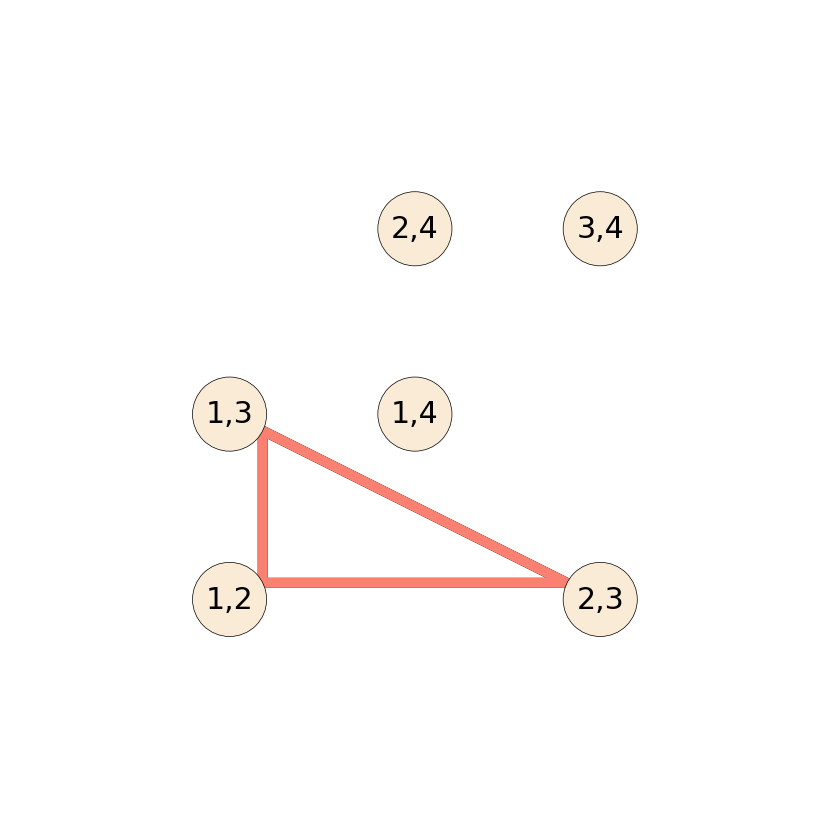

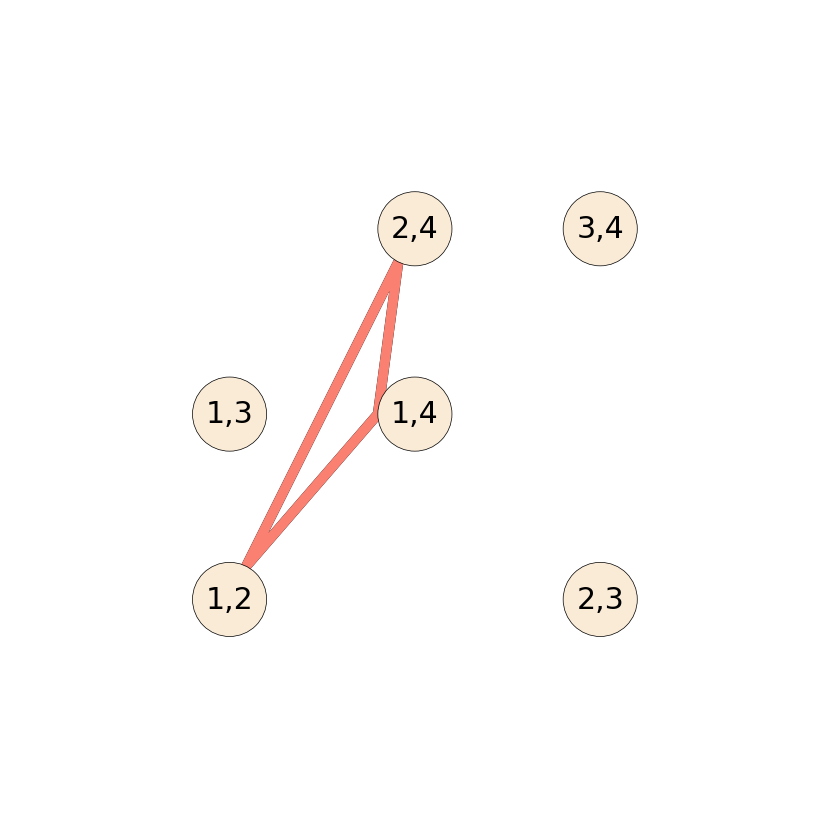

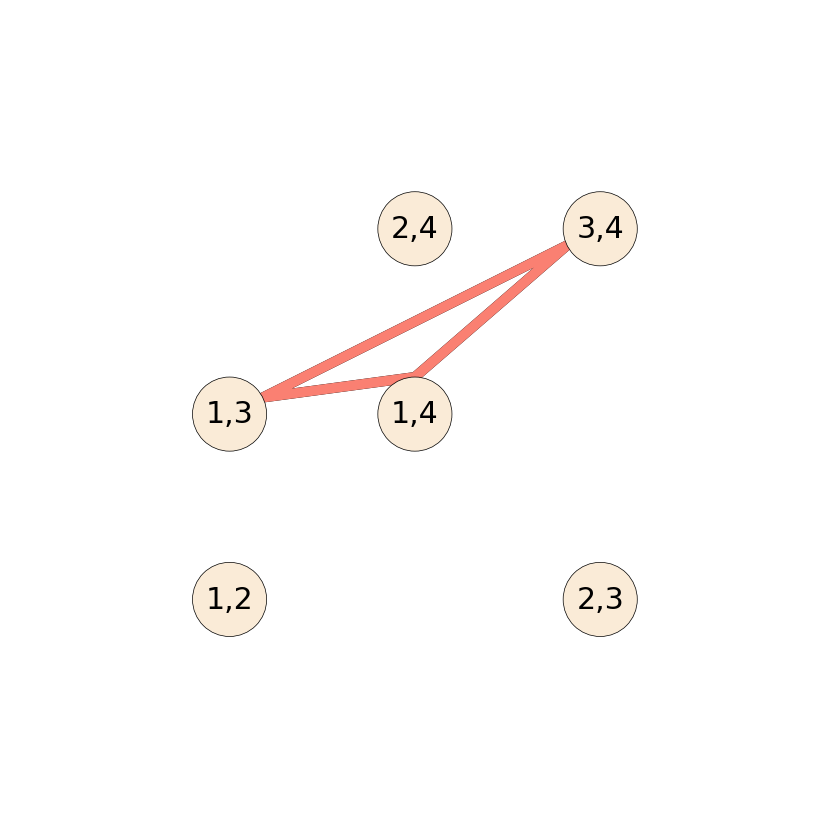

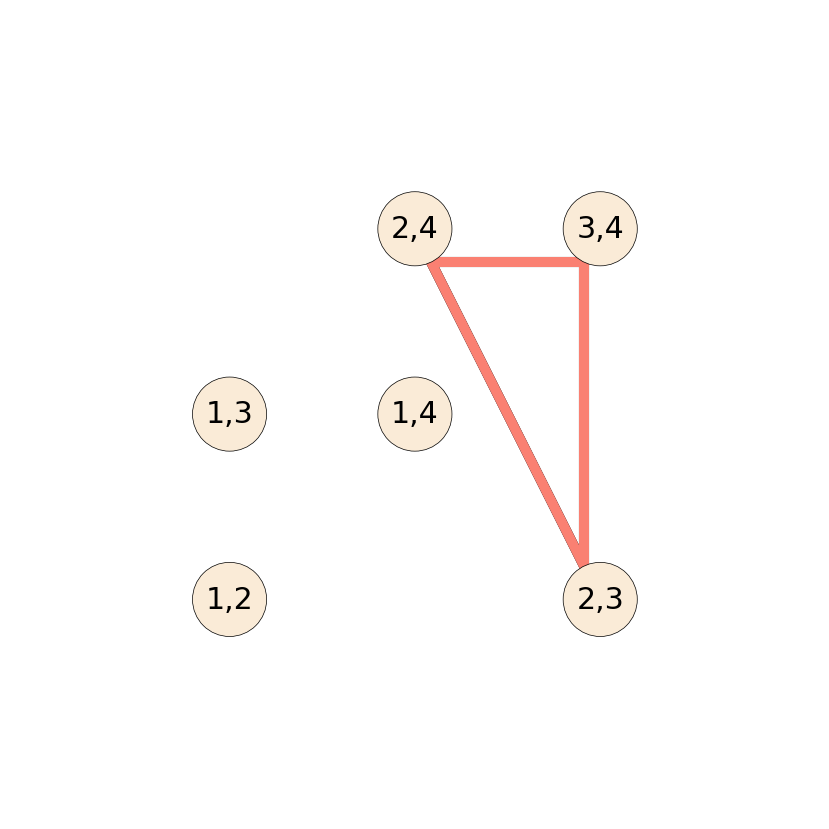

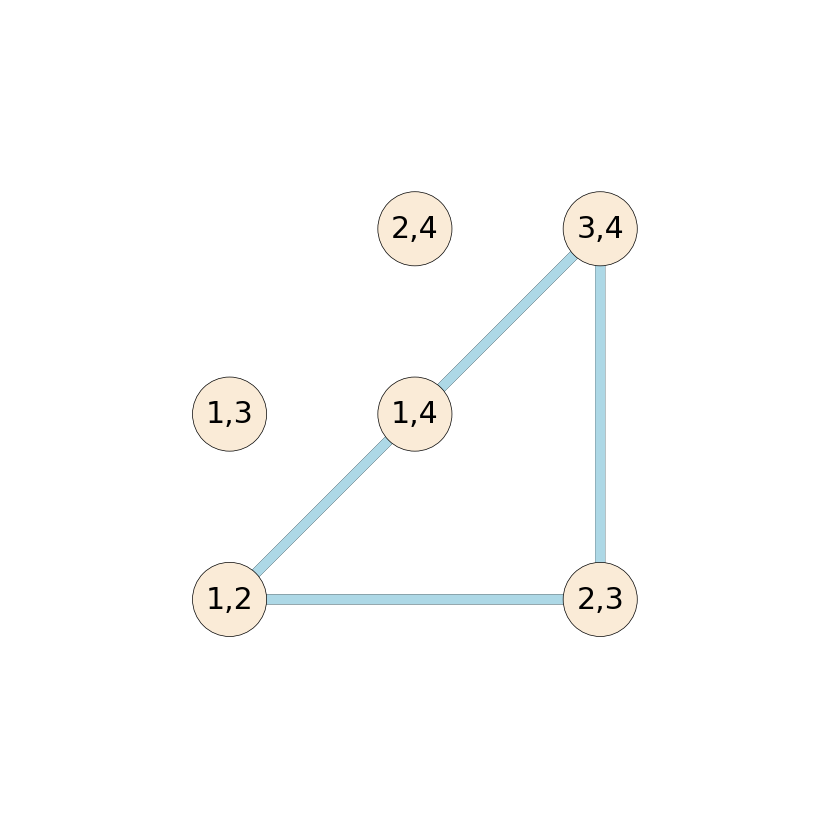

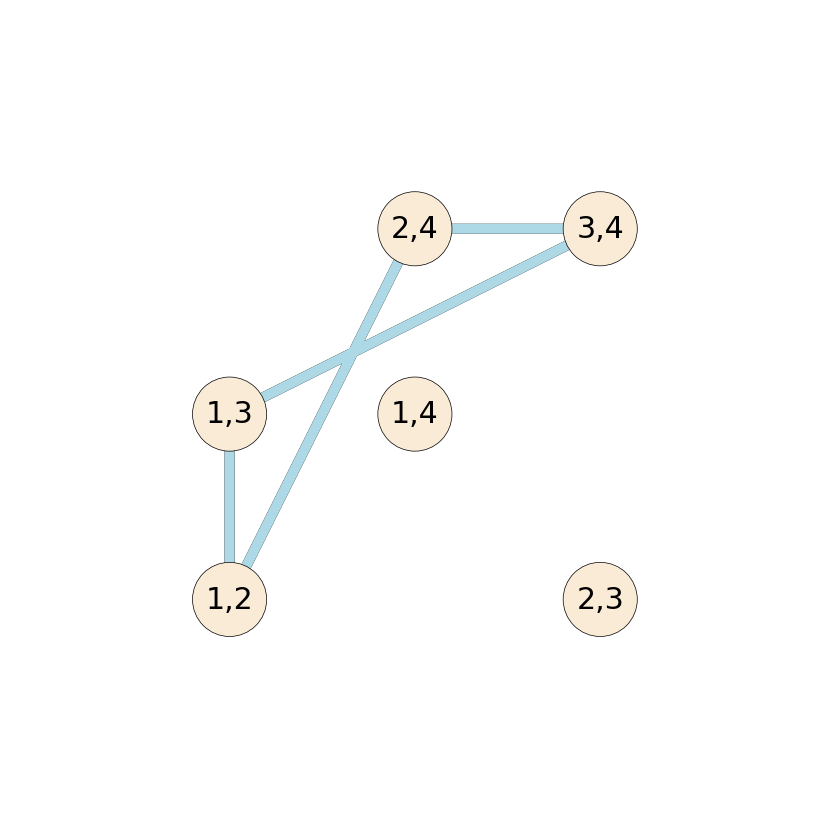

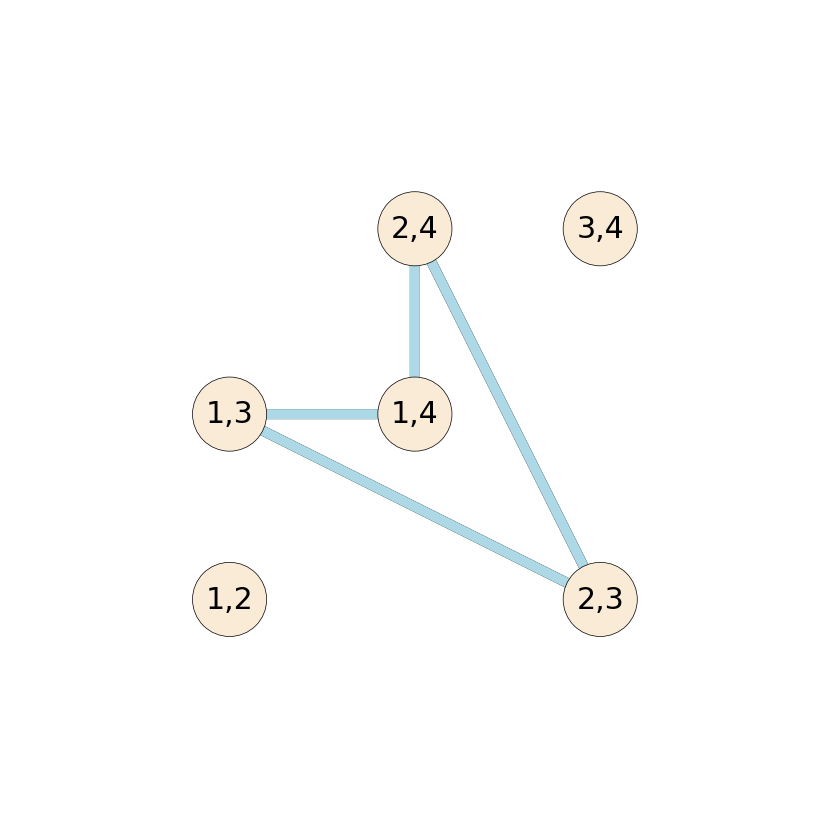

In [51]:
qubit_to_coord_dict = {
    (1, 2): (0, 0),
    (1, 3): (0, 1),
    (1, 4): (1, 1),
    (2, 4): (1, 2),
    (2, 3): (2, 0),
    (3, 4): (2, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]




#ax = polygon_object.visualize()
polygons_ = [[(1, 2), (2, 3), (1, 3)],
 [(1, 2), (2, 4), (1, 4)],
 [(1, 3), (3, 4), (1, 4)],
 [(2, 3), (3, 4), (2, 4)],
 [(1, 2), (2, 3), (3, 4), (1, 4)],
 [(1, 2), (2, 4), (3, 4), (1, 3)],
 [(1, 3), (2, 3), (2, 4), (1, 4)]]

for idx, polygonss in enumerate(polygons_):
    graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
    qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
    nodes_object = Nodes(qbits, place_qbits_in_lines=False)
    polygon_object = Polygons(nodes_object, scope_measure=True)
    fig, ax = plt.subplots(figsize=(15, 15))

    self=polygon_object
    zoom=1
    figsize=(15, 15)
    core_corner=None
    check_ancilla_in_core: bool = True
    envelop_rect=None
    rotate: bool=False
    radius=0.2
    corner_lw=10
    color_of_grid_points="white"
    alpha_of_grid_points=0
    padding=1
    s=0.6
    without_label=False
    if ax is None: _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')

    if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect(padding=padding)
    ax.scatter(*list(zip(*envelop_rect)), color=color_of_grid_points, s=s, alpha=alpha_of_grid_points)

    # if core_corner is not None:
    #     (min_x, max_x), (min_y, max_y) = core_corner
    #     envelop = [Polygons.rotate_coords_by_45(p, rotate) 
    #                for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
    #     patch = plt.Polygon(
    #         envelop, zorder=10, fill=False, lw=corner_lw, edgecolor="black", alpha=0.5
    #     )
    #     ax.add_patch(patch)
    self.polygons = [polygonss]
    # color plaquettes
    print(self.polygons)
    for polygon in self.polygons_coords(
        self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
    ):  
        fill, facecolor, lw, alpha, edge_alpha = False, 'lightblue', 10, 1, 0

        if len(polygon) != 4:
            fill, facecolor, lw, alpha, edge_alpha = False, 'salmon', 10, 1, 0

            polygon = Polygons.scale(polygon, radius)
        polygon = [Polygons.rotate_coords_by_45(p, rotate)
                   for p in polygon]
        patch = plt.Polygon(
            polygon,
            zorder=10,
            fill=False,
            lw=lw,
            edgecolor=facecolor,
            alpha=alpha,
        )
        edge = plt.Polygon(
            polygon,
            zorder=0,
            fill=False,
            lw=lw+.1,
            edgecolor="black",
            alpha=1
        )
        ax.add_patch(patch)
        ax.add_patch(edge)
    # color qbits
    for qbit in self.nodes_object.qbits:
        coord = qbit.coord
        fontsize = 30
        label_text = ""
        if not without_label:
            label_text = r"{},{}".format(*qbit.qubit)
        label = ax.annotate(
            label_text,
            xy=coord,
            ha="center",
            va="center",
            fontsize=fontsize,
            zorder=20,
        )
        if qbit.core == False:
            circle = plt.Circle(
                coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
            )
        ax.add_patch(circle)


    ax.figure.savefig(paths.plots / f"Figures/pngs/N_4_qbits_on_grid_single_loop_{idx}.png")


5
5
5
5
5
5
5
5
5
5


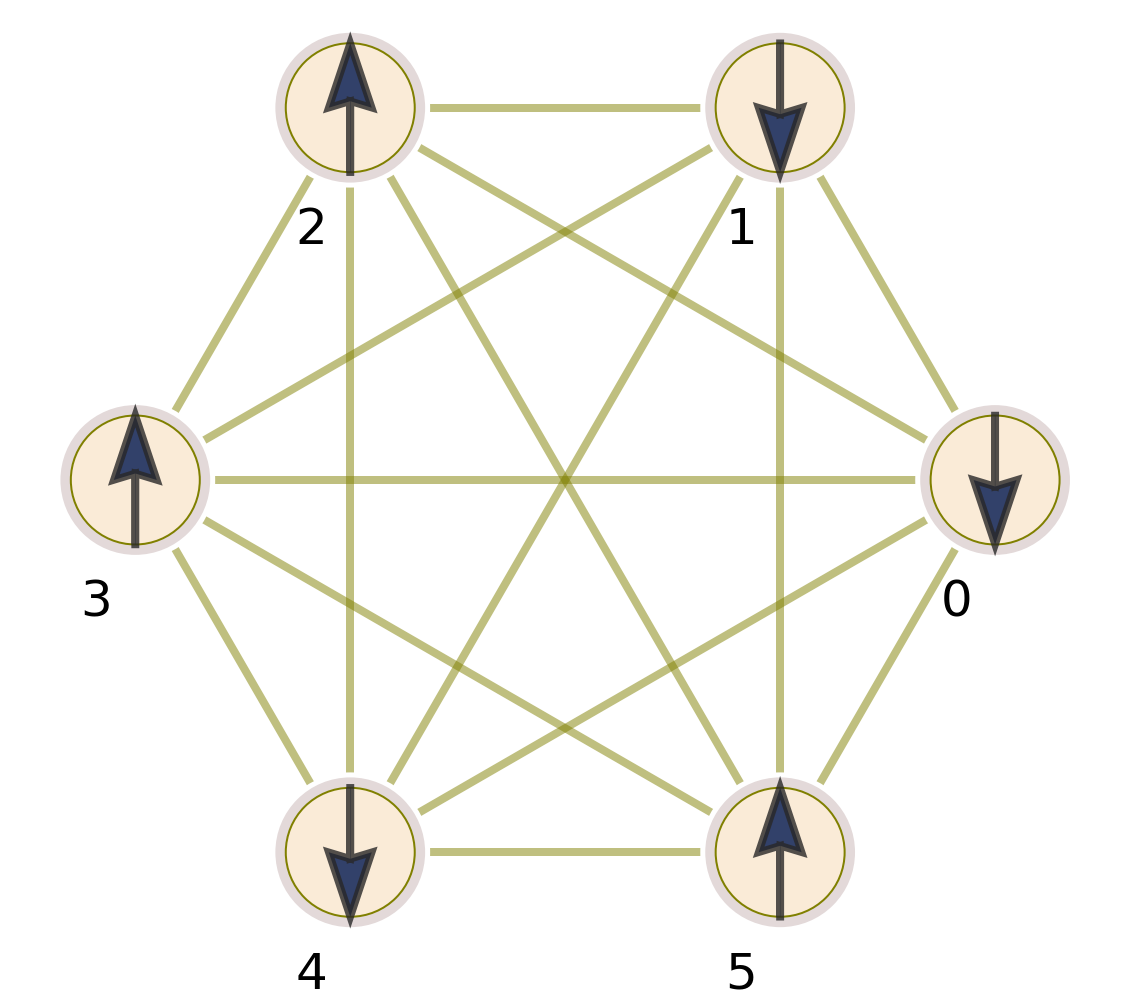

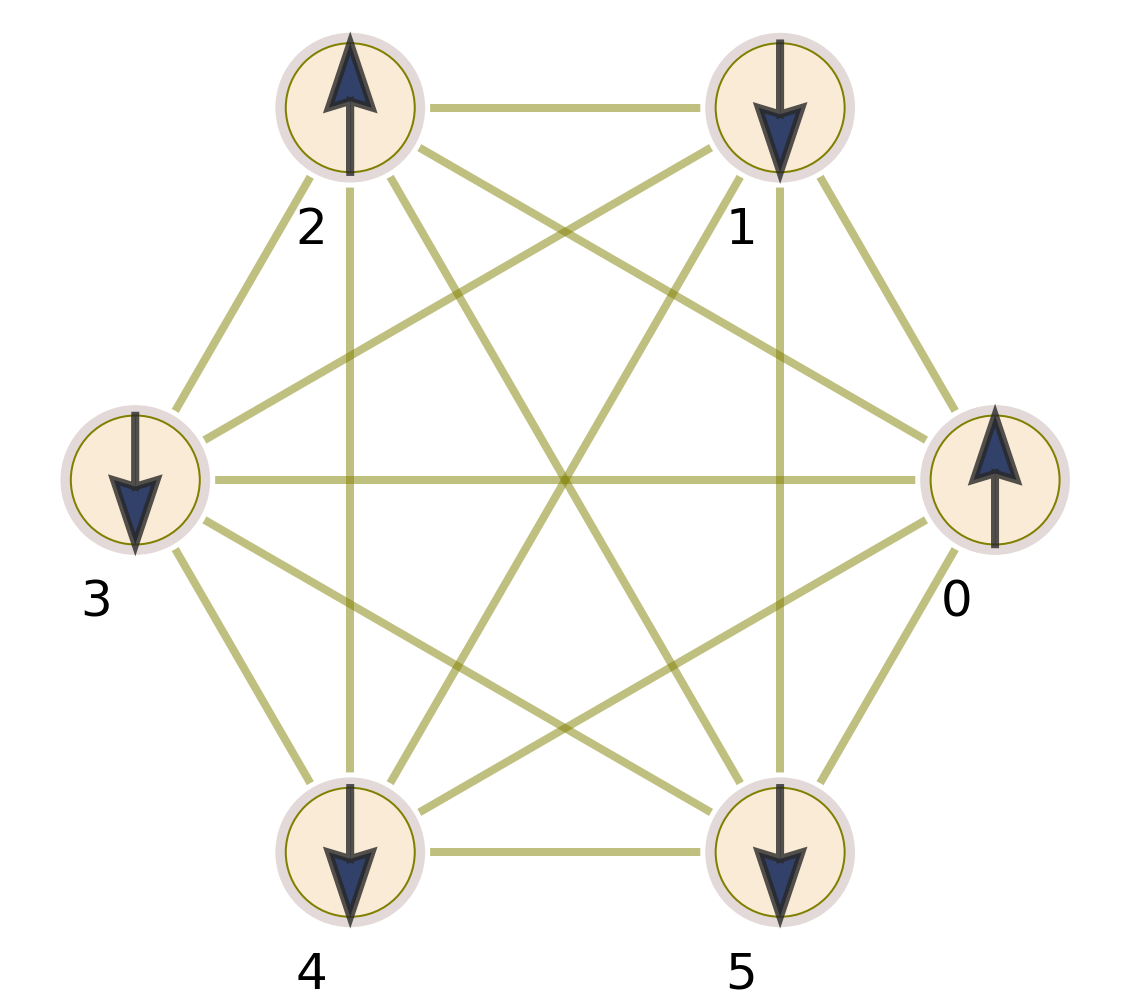

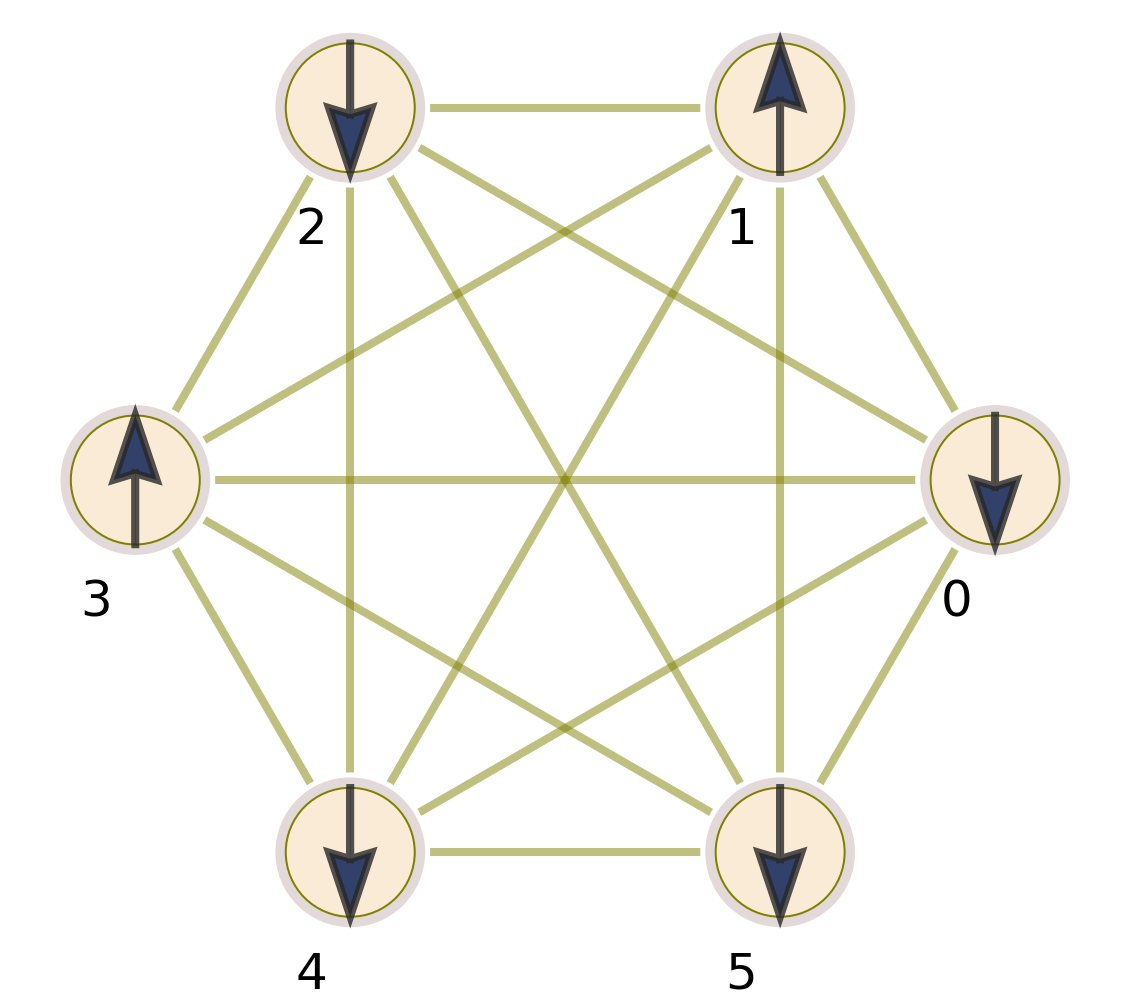

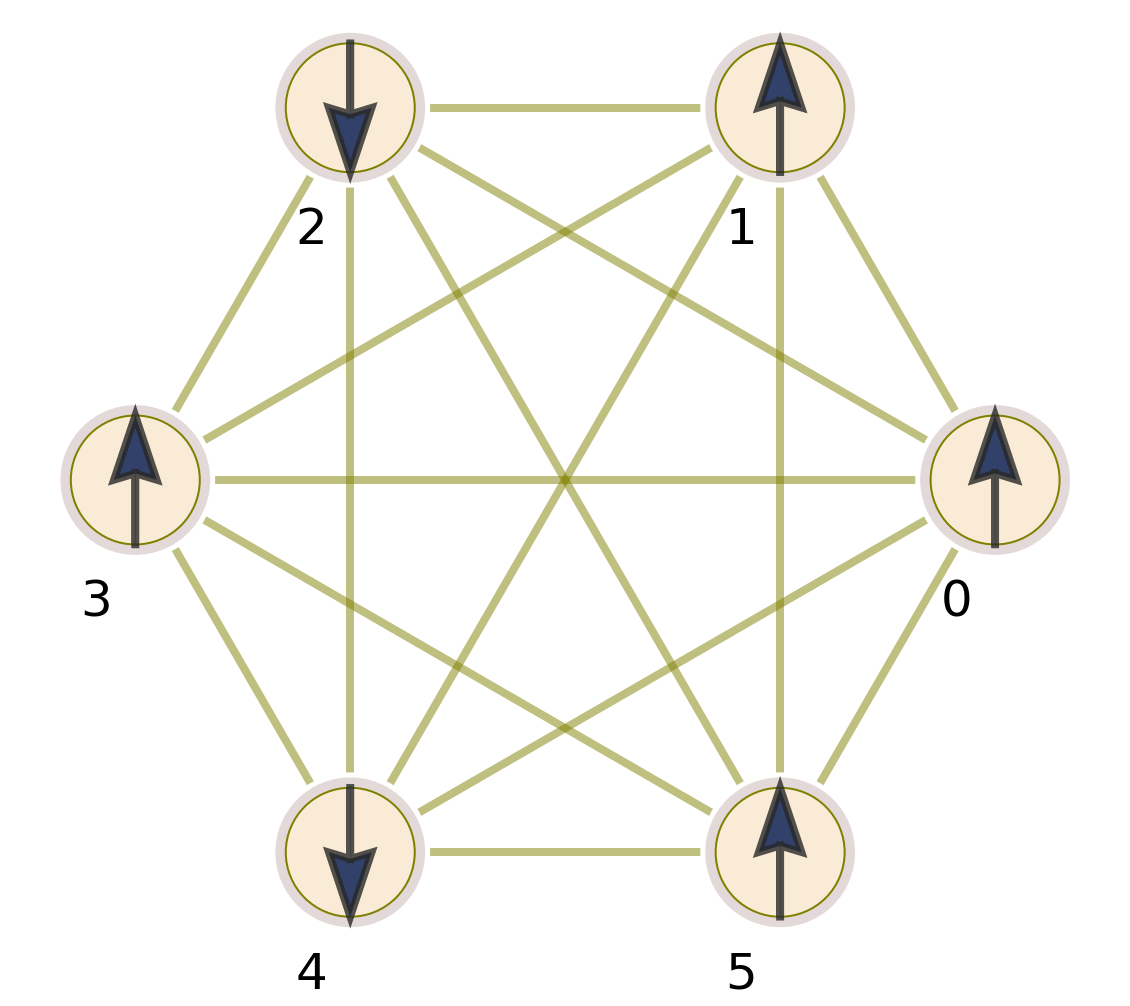

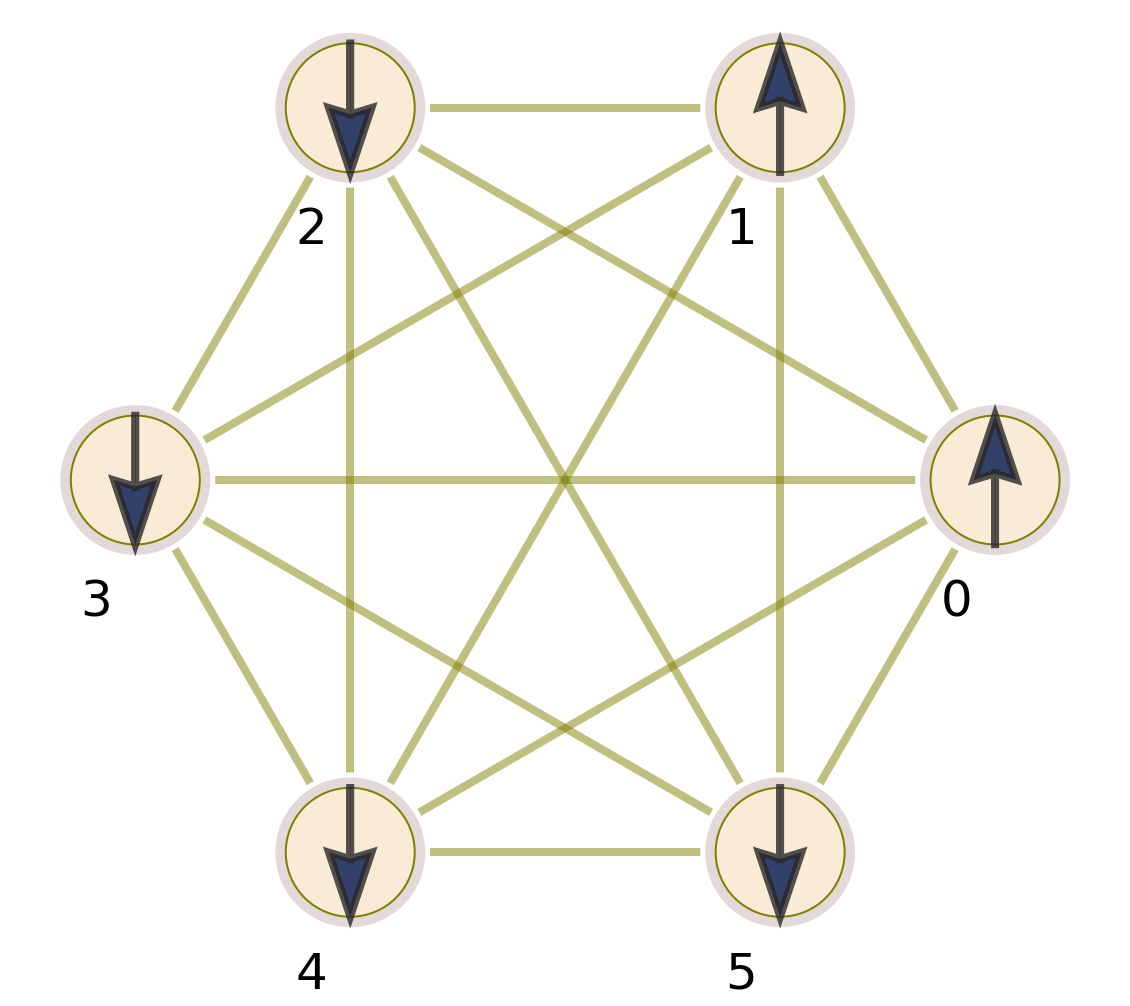

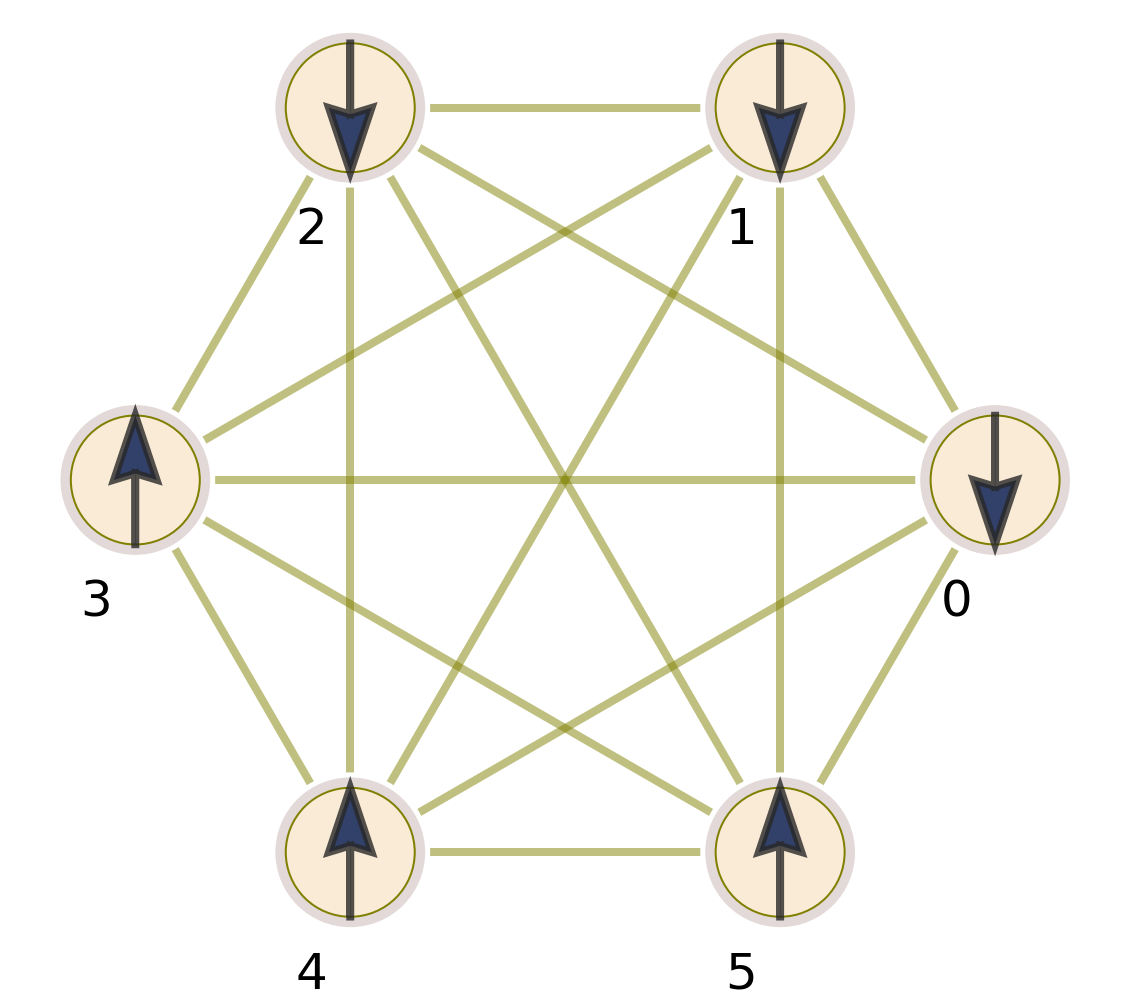

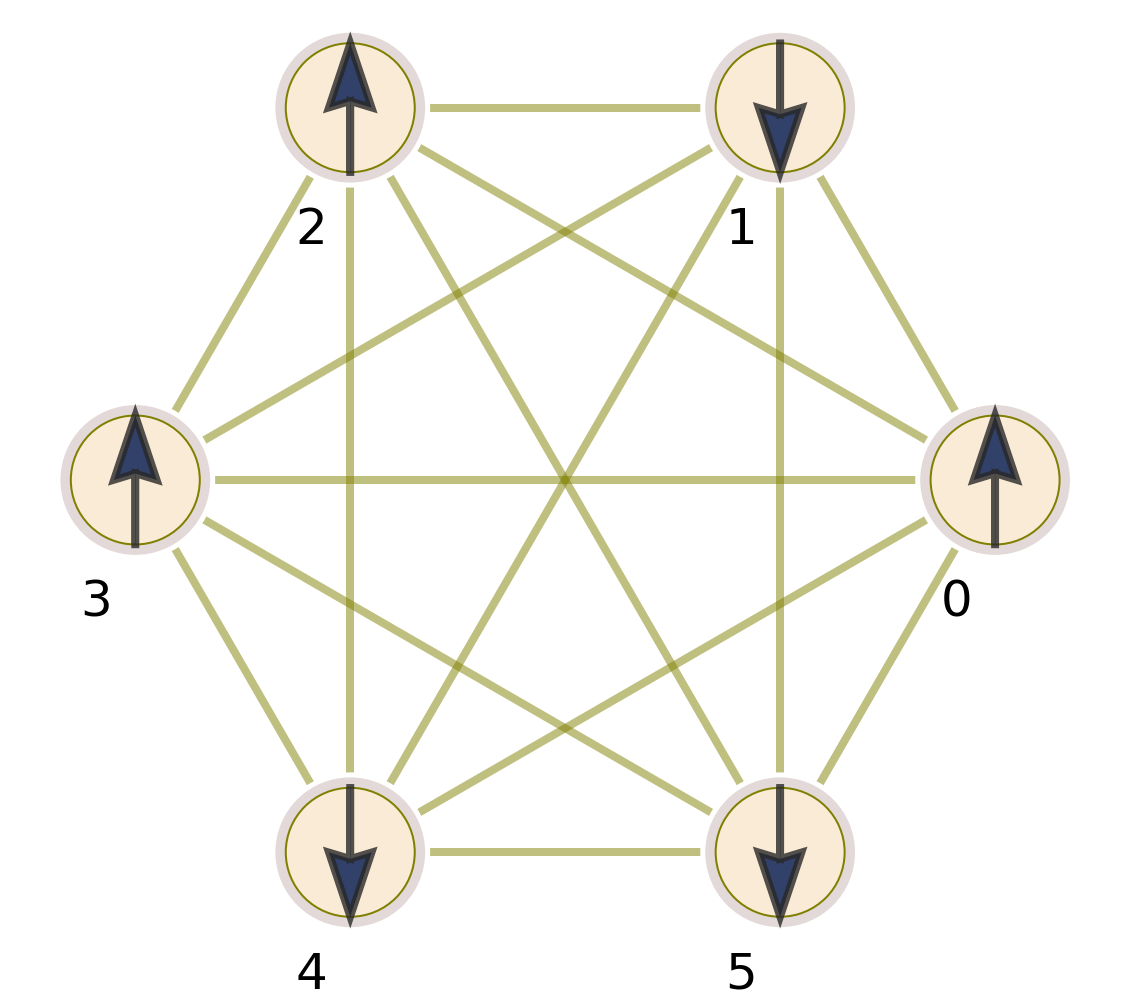

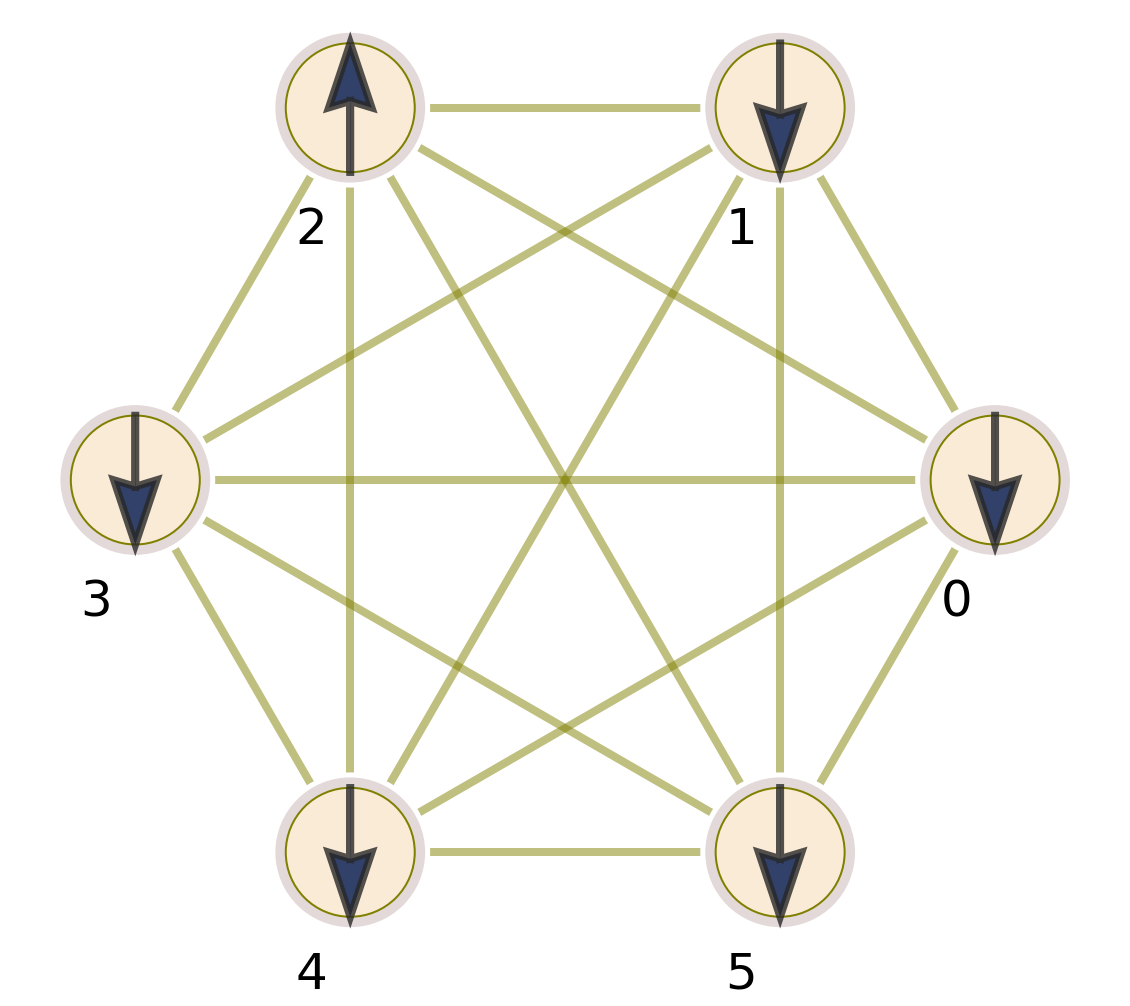

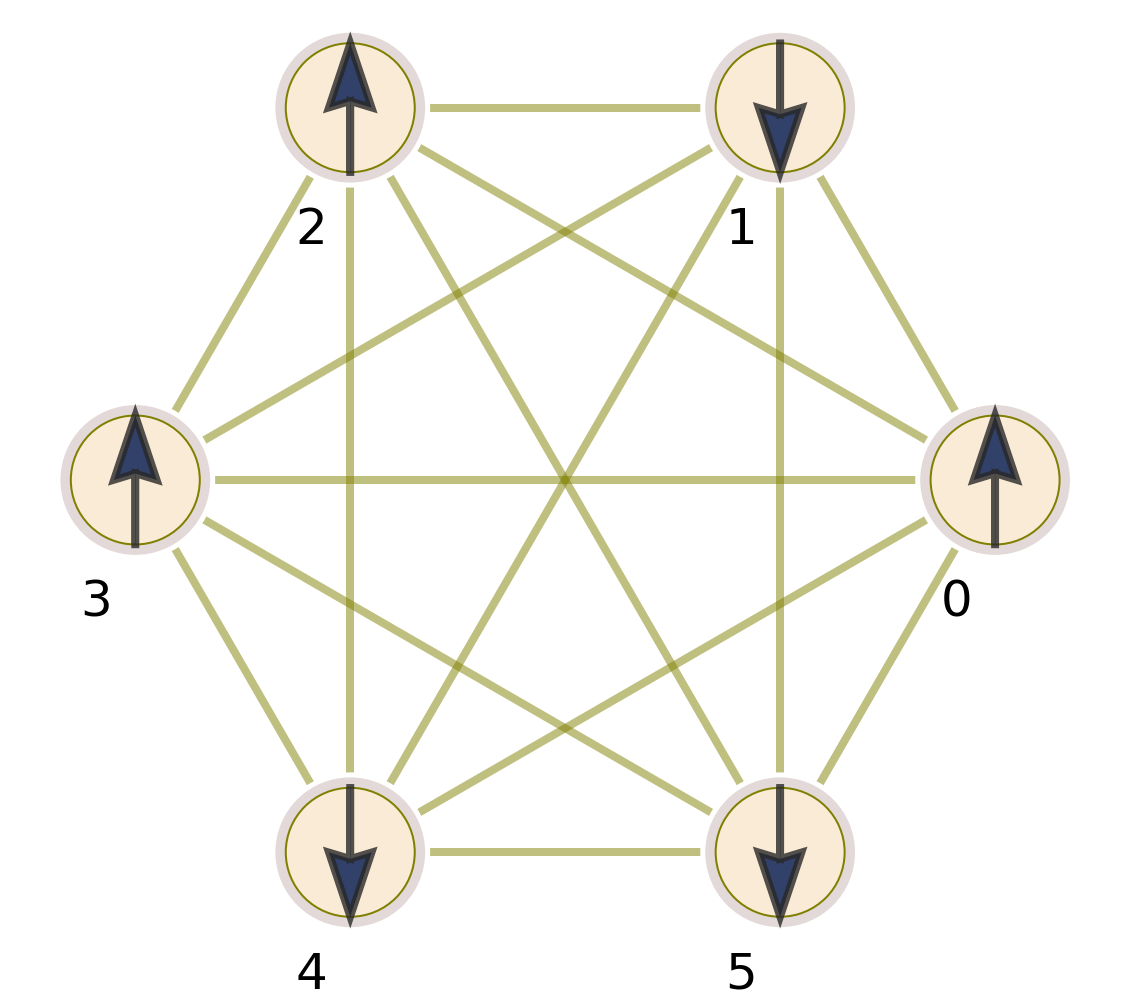

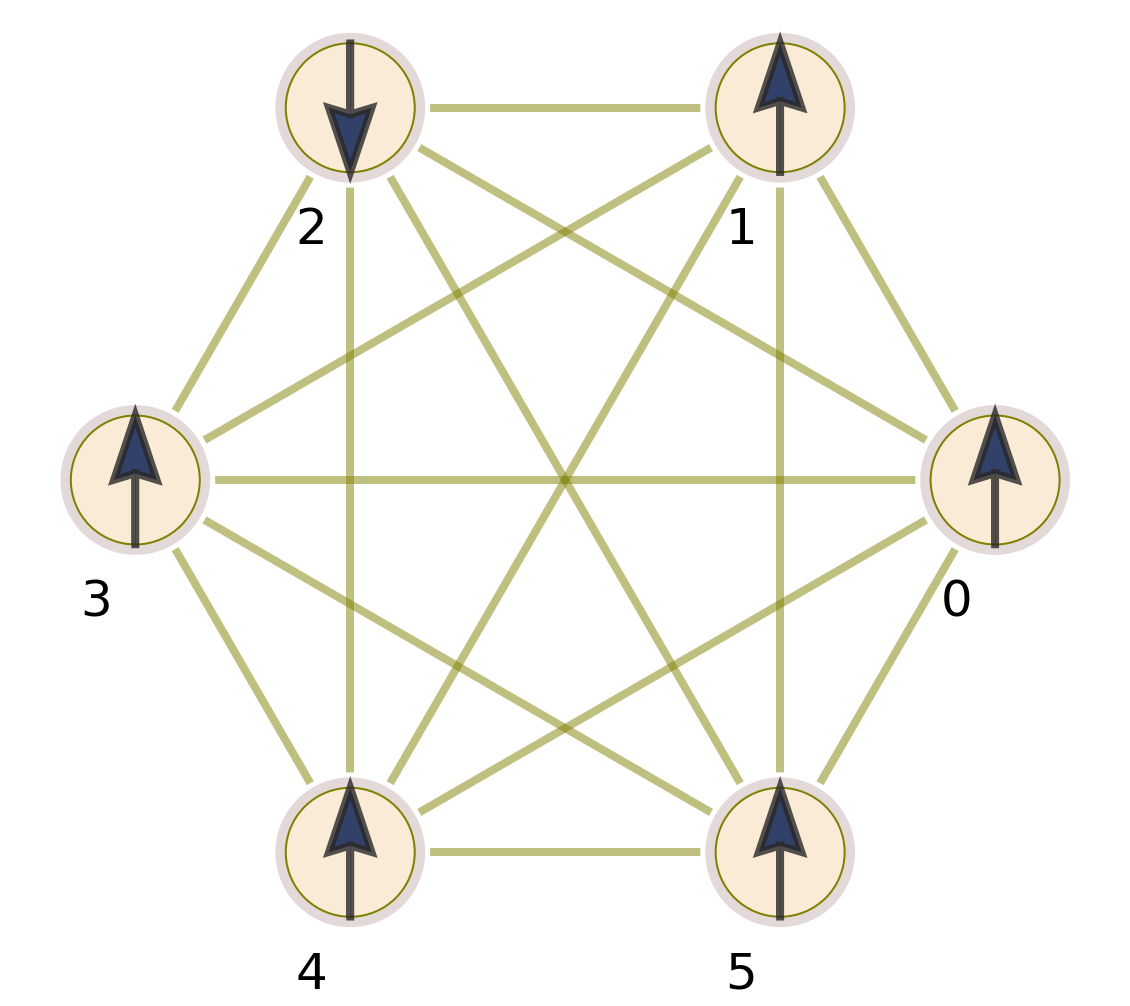

In [193]:
circles = Circles([])
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
N = 6
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]


for r_idx in range(0, 10):
    polygons = [[]] #+ polygons
    for polygon in polygons:
        cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
        figsize = (20, 20)
        edges = Edges([])
        circles = Circles([])
        for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(6)):
            up = (idx**2+idx*i)%2==0
            circles.add_circle(
                Circle(
                    coord=(i, j),
                    color="antiquewhite",
                    name=idx,
                    up=up,
                    down=not up,
                    size=0.15,
                    fontsize=50,
                    lw=2,
                    edgecolor='olive',
                )
            )

        for edge in list(combinations(circles.coords, 2)):
            edges.add_edge(
                Edge(
                    edge=edge,
                    color='olive',
                    lw=8,
                    alpha=0.5,
                    ew=0,
                    zorder=0,
                )
            )

        constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                     for (i, j) in polygon]


        _, ax = plt.subplots(figsize=figsize)
        ax.set_aspect('equal', 'box')
        ax.axis('off')
        ax.scatter(*circles.xy, color="black", s=0, alpha=1)
        ax.set_ylim(-1.2,1.1)

        for edge in edges:
            if edge.edge in constraint:
                edge.linewidth = 8
                edge.edgewidth= 10
                edge.alpha=1
                edge.color='#A52A2A'
                edge.zorder=4
                edge.edgecolor='salmon'

            outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
            ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


        for circle in circles:
            if circle.name is not None:
                label = ax.annotate(
                    r"{}".format(circle.name),
                    xy= (circle.coord[0] -circle.size * 0.6 , circle.coord[1]-circle.size * 1.9),
                    ha="center",
                    va="center",
                    fontsize=circle.fontsize,
                    zorder=10,
                    color='black'

                )
            patch = plt.Circle(
                circle.coord,
                radius=circle.size*1.2,
                alpha=1,
                fill=True,
                fc='#e3d9d9',
                lw=5,
                ec='white',
                zorder=circle.zorder
            )
            ax.add_patch(patch)

            ax.add_patch(circle.patch)

            if random.randint(0, 1) == 1:
                ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                         linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                         fc='#00164F', ec='#282727', zorder=6)
            else:
                ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                         linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                         fc='#00164F', ec='#282727', zorder=6)
        loop = "".join((cycle[0]))
        print(idx)
        plt.savefig(paths.plots / f"Figures/pngs/spin_glass_graph_random_{r_idx}.png")

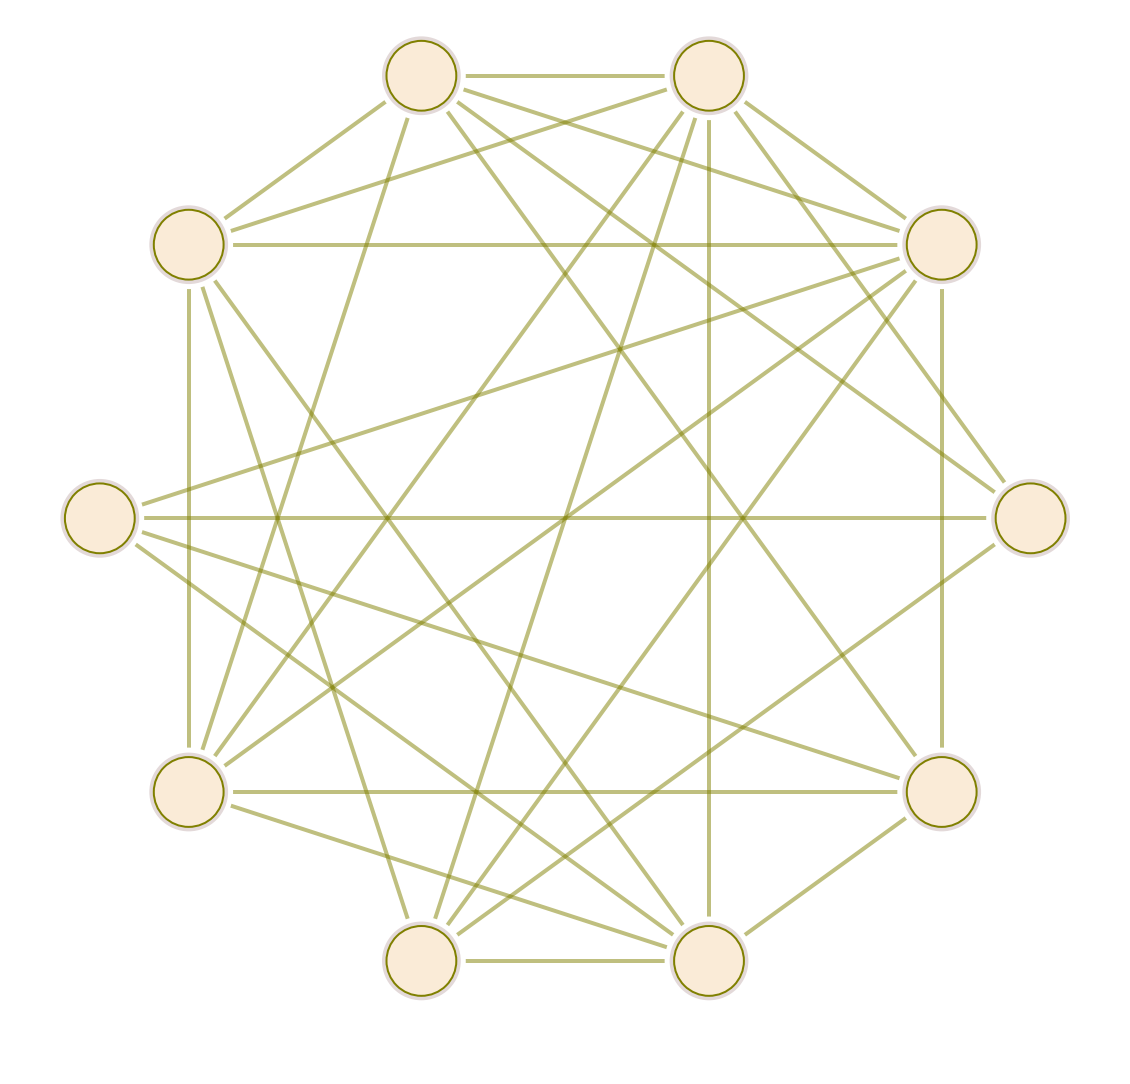

In [113]:
circles = Circles([])
N = 10

for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]


polygons = [[]] #+ polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        if random.random() < 0.45:
            continue
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=4,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in constraint:
            edge.linewidth = 1
            edge.edgewidth= 1
            edge.alpha=1
            edge.color='#A52A2A'
            edge.zorder=4
            edge.edgecolor='salmon'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        circle.size = 0.075#
        circle.fontsize = 35
        if circle.name is not None:
            label = ax.annotate(
                "",#r"{}".format(circle.name),
                xy= circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
    loop = "".join((cycle[0]))
ax.figure.savefig(paths.plots / f"Figures/pngs/large_sping_glass.png")


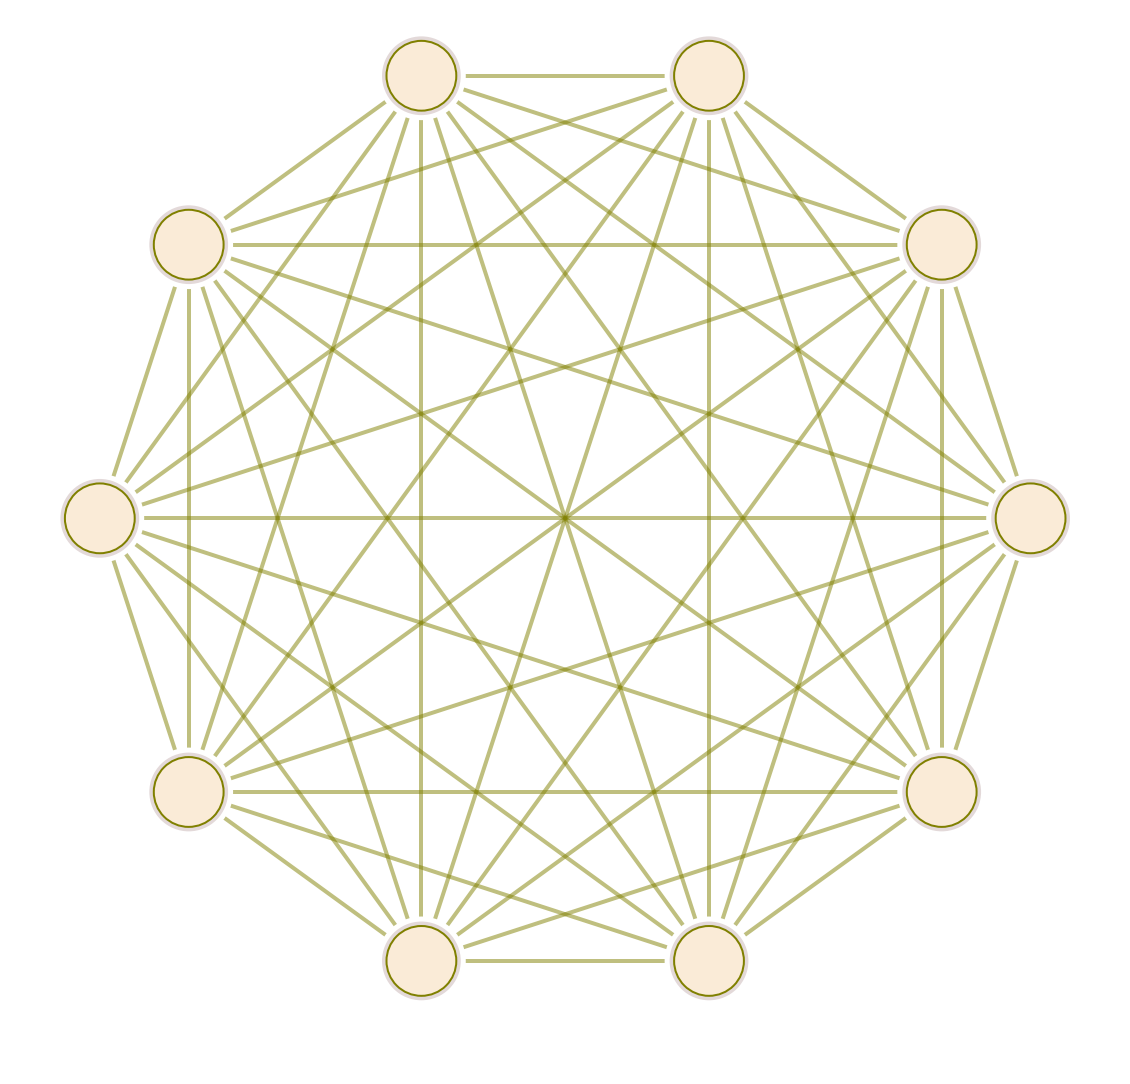

In [110]:
circles = Circles([])
N = 10

for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]


polygons = [[]] #+ polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=4,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in constraint:
            edge.linewidth = 1
            edge.edgewidth= 1
            edge.alpha=1
            edge.color='#A52A2A'
            edge.zorder=4
            edge.edgecolor='salmon'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        circle.size = 0.075#
        circle.fontsize = 35
        if circle.name is not None:
            label = ax.annotate(
                "",#r"{}".format(circle.name),
                xy= circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
    loop = "".join((cycle[0]))
ax.figure.savefig(paths.plots / f"Figures/pngs/large_complete_sping_glass.png")


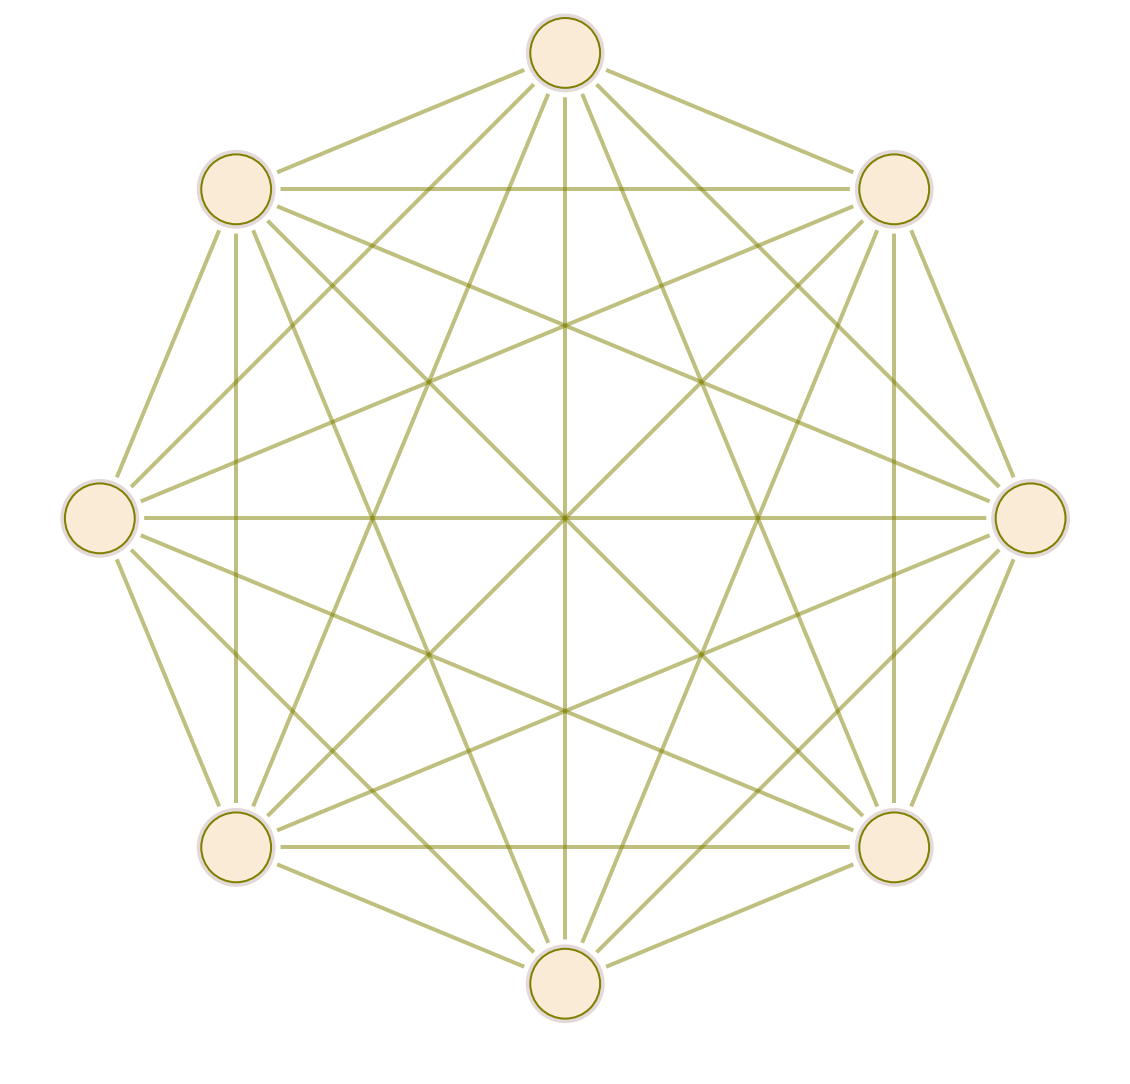

In [3]:
circles = Circles([])
N = 8

for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]


polygons = [[]] #+ polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=4,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in constraint:
            edge.linewidth = 1
            edge.edgewidth= 1
            edge.alpha=1
            edge.color='#A52A2A'
            edge.zorder=4
            edge.edgecolor='salmon'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        circle.size = 0.075#
        circle.fontsize = 35
        if circle.name is not None:
            label = ax.annotate(
                "",#r"{}".format(circle.name),
                xy= circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
    loop = "".join((cycle[0]))
ax.figure.savefig(paths.plots / f"Figures/pngs/large_complete_sping_glass_N_{N}.png")


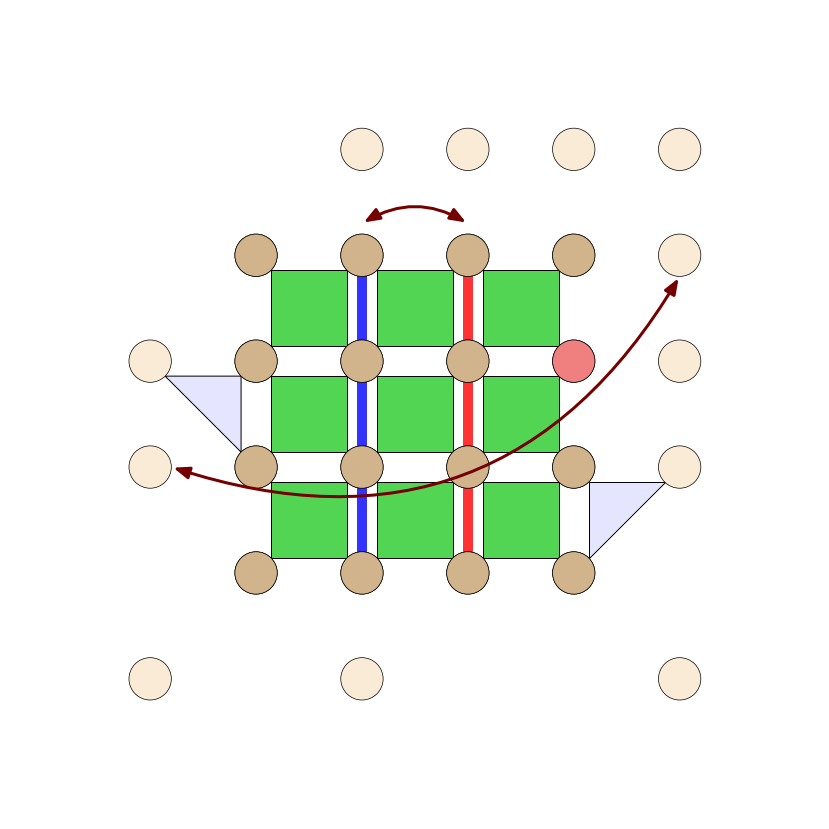

In [103]:
alpha = 0.8
core_plaquettes = [
 [(0, 4), (4, 5), (0, 6), (5, 6)],
 [(0, 6), (5, 6), (0, 3), (3, 5)],
 [(0, 3), (3, 5), (0, 2), (2, 5)],
 [(4, 5), (1, 4), (5, 6), (1, 6)],
 [(5, 6), (1, 6), (3, 5), (1, 3)],
 [(3, 5), (1, 3), (2, 5), (1, 2)],
 [(1, 4), (4, 7), (1, 6), (6, 7)],
 [(1, 6), (6, 7), (1, 3), (3, 7)],
 [(1, 3), (3, 7), (1, 2), (2, 7)],
]

qubit_to_coord_dict = {(0, 1): (4, 6),
 (0, 2): (3, 4),
 (0, 3): (2, 4),
 (0, 4): (0, 4),
 (0, 5): (4, 5),
 (0, 6): (1, 4),
 (0, 7): (4, 7),
 (1, 2): (3, 6),
 (1, 3): (2, 6),
 (1, 4): (0, 6),
 (1, 5): (5, 6),
 (1, 6): (1, 6),
 (1, 7): (6, 7),
 (2, 3): (2, 3),
 (2, 4): (0, 3),
 (2, 5): (3, 5),
 (2, 6): (1, 3),
 (2, 7): (3, 7),
 (3, 4): (0, 2),
 (3, 5): (2, 5),
 (3, 6): (1, 2),
 (3, 7): (2, 7),
 (4, 5): (0, 5),
 (4, 6): (0, 1),
 (4, 7): (0, 7),
 (5, 6): (1, 5),
 (5, 7): (5, 7),
 (6, 7): (1, 7)}


qubit_coord_dict = {q: c for q, c in qubit_to_coord_dict.items() if q in {node for plaq in core_plaquettes for node in plaq}}
graph = Graph.complete(8)
qubit_coord_dict = Polygons.move_to_center(qubit_coord_dict, graph.K)
qubit_coord_dict = {q: (c[0], c[1]-1) for q,c in qubit_coord_dict.items()}
qbits = Qbits.init_qbits_from_dict(graph, qubit_coord_dict, assign_to_core=True)

fig, ax = plt.subplots(figsize=(15, 15))


graph_ = Graph.init_without_edges(8, edges_to_remove=[qubit for qubit in Graph.complete(8).qubits if qubit not in [q.qubit for q in qbits.core_qbits]])
qbits_ = Qbits.init_qbits_from_dict(graph_, qubit_coord_dict, assign_to_core=True)
qbits_[(1, 2)].ancilla=True

nodes_object_ = Nodes(qbits_, place_qbits_in_lines=False)
polygon_object_ = Polygons(nodes_object_)

ax = visualize_(polygon_object_,  ax=ax, polygons=core_plaquettes, rotate=False)
ax.figure.savefig(paths.plots / "Figures/pngs/visualize_search_0.png")



shell_qubit_coord_dict = {(0, 1): (4, 5),
 (0, 5): (5, 2),
 (0, 7): (0, 0),
 (1, 5): (0, 3),
 (1, 7): (5, 5),
 (2, 3): (0, 2),
 (2, 4): (2, 5),
 (2, 6): (3, 5),
 (3, 4): (5, 4),
 (3, 6): (5, 3),
 (4, 6): (5, 0),
 (5, 7): (2, 0)}

qbits[(1, 2)].ancilla=True
for q, c in shell_qubit_coord_dict.items():
    qbits.update(q, c)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = visualize_(polygon_object,  ax=ax, polygons=core_plaquettes, rotate=False)
ax.figure.savefig(paths.plots / "Figures/pngs/visualize_search_1.png")

a = ax.plot(
    [2, 2, 2, 2],
    [1, 2, 3, 4],
    linewidth = 10,
    alpha=alpha,
    zorder=0,
    color='blue',
)
a = ax.plot(
    [3, 3, 3, 3],
    [1, 2, 3, 4],
    linewidth = 10,
    alpha=alpha,
    zorder=0,
    color='red',
)
a[0].set_solid_capstyle('round')
style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((3, 4.3), (2, 4.3),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
ax.figure.savefig(paths.plots / "Figures/pngs/visualize_search_2.png")
style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((0.2, 2), (5, 3.8),lw=3,connectionstyle="arc3,rad=0.4", **kw, zorder=39, color='#750000')
ax.add_patch(a3)
ax.figure.savefig(paths.plots / "Figures/pngs/visualize_search_3.png")



# plt.savefig(paths.plots / "Figures/core_in_LHZ_graph.pdf")
# plt.savefig(paths.plots / "Figures/pngs/core_in_LHZ_graph.png")

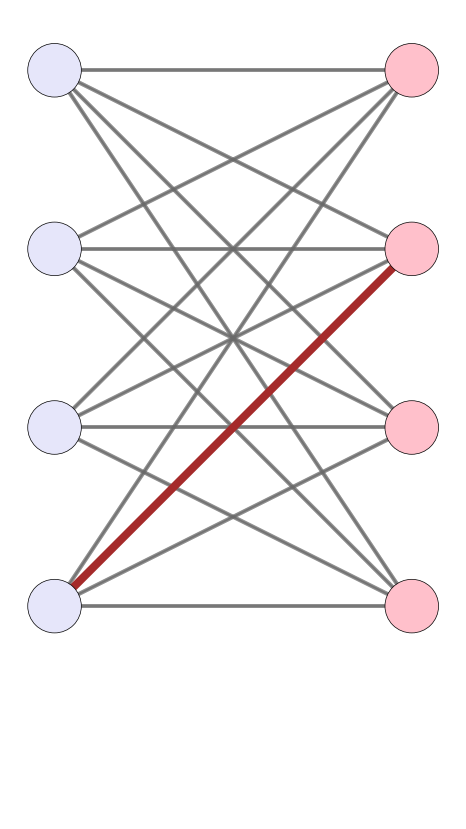

In [4]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y) for (x, y) in Acoords]

Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4)]
Bcoords = [(x + 1, y) for (x, y) in Bcoords]

edges = [(a, b) for a in Acoords for b in Bcoords]

A, B  = [], []#[Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
for edge in edges:

    x, y = list(zip(*edge))
    outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
    ax.plot(x, y, color='dimgray', lw=4, path_effects=[outline], alpha=0.5)


# plt.savefig(paths.plots / 'Figures/bipartite_graph_0.pdf')
plt.savefig(paths.plots / "Figures/pngs/bipartite_graph_44.png")

for edge in edges:
    if edge == ((0, 1), (2, 3)):
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=8, path_effects=[outline], zorder=5)
    
    else:  
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
        ax.plot(x, y, color='dimgray', lw=4, path_effects=[outline], alpha=0.5)


# plt.savefig(paths.plots / 'Figures/bipartite_graph_0.pdf')
plt.savefig(paths.plots / "Figures/pngs/bipartite_graph_with_red_link.png")

In [97]:
[qubit for qubit in qubits if qubit not in [q.qubit for q in qbits.core_qbits]]

[(0, 1), (0, 5), (1, 5), (2, 3), (2, 4), (2, 6), (3, 4), (3, 6), (4, 6)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (6, 7)]

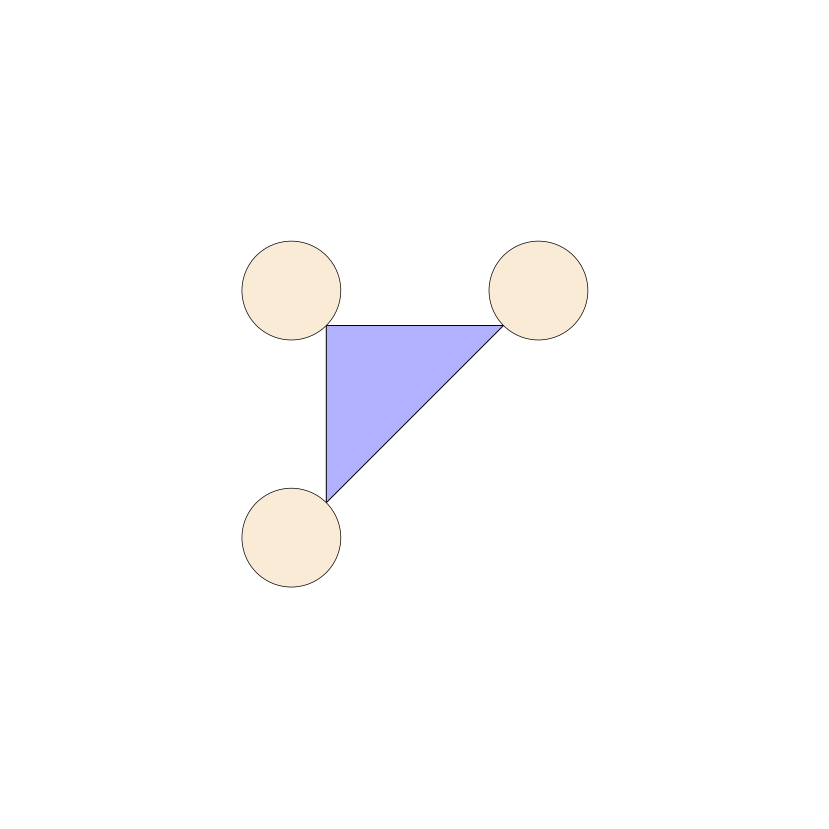

In [120]:
N = 4

circles = Circles([])
spin = [True, True, True, True]
for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = spin[idx]
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}

rotate = True
graph = Graph.init_without_edges(N, [(0, 1), (0, 2), (0, 3)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
polygons = [[(1, 2),(1, 3),(2, 3)]]

ax = visualize_without_labels(polygon_object)
ax.figure.savefig(paths.plots / "Figures/parity_triangle.pdf")
ax.figure.savefig(paths.plots / "Figures/pngs/parity_triangle.png")



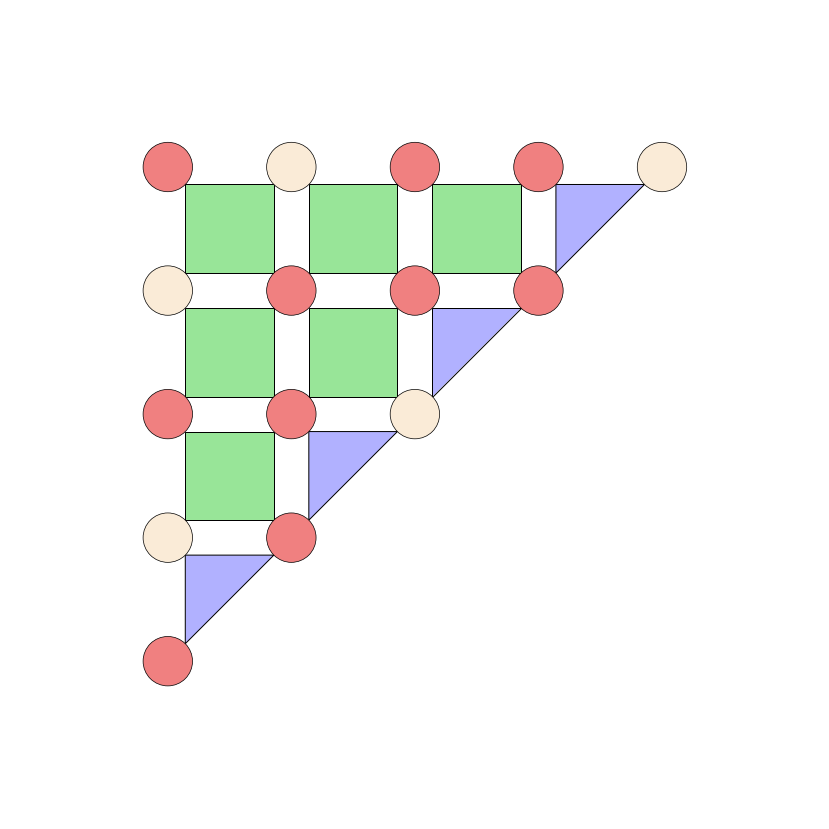

In [125]:
qubits = [
    (0, 3),
    (0, 2),
    (0, 1),
    (2, 3),
    (1, 2),
    (2, 5),
    (3, 4),
    (1, 4),
    (4, 5),
    (3, 5),
]

graph = Graph.complete(6)
qbits = Qbits.init_qbits_from_dict(graph, dict())
for qubit in qubits:
    qbits[qubit].ancilla = True
    qbits[qubit].core = True
nodes_object = Nodes(qbits)
polygon_object = Polygons(nodes_object)
ax = visualize_without_labels(polygon_object)
ax.figure.savefig(paths.plots / "Figures/pngs/ancillas_instead_of_swaps.png")


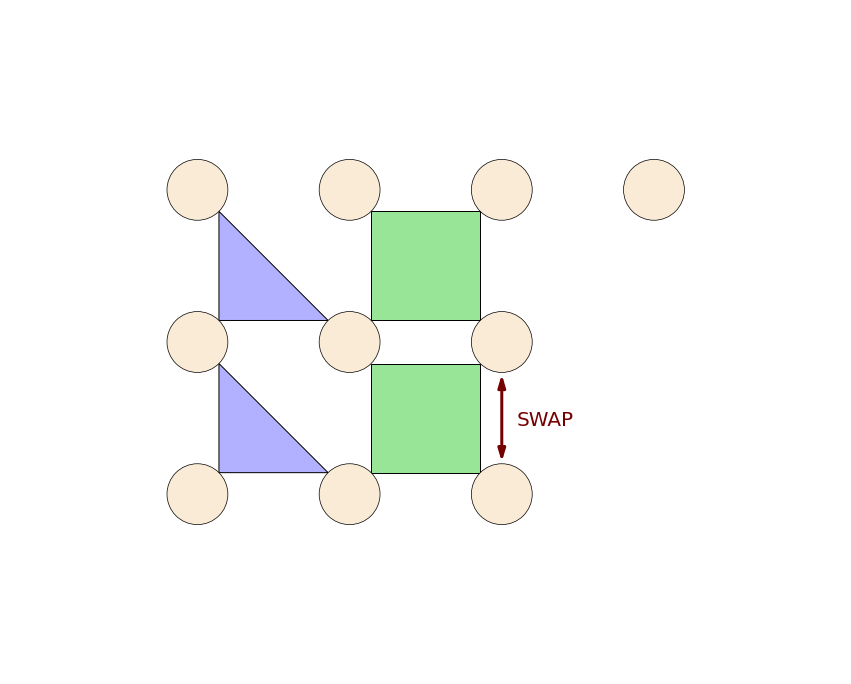

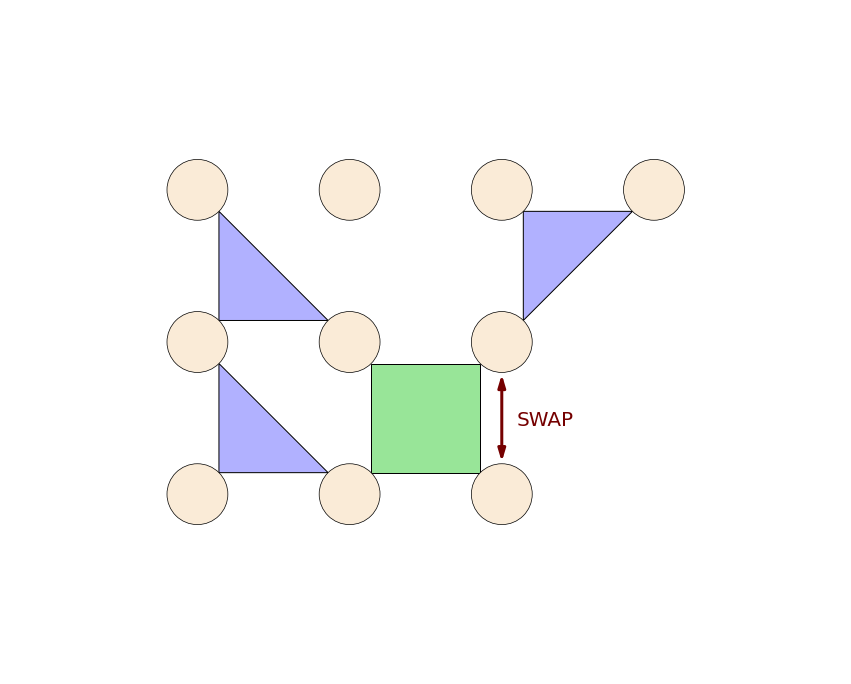

In [133]:
qubit_to_coord_dict = {
    (1, 4): (0, 0),
    (1, 3): (0, 1),
    (1, 2): (0, 2),
    (3, 4): (1, 0),
    (2, 3): (1, 1),
    (3, 6): (1, 2),
    (4, 5): (2, 0),
    (2, 5): (2, 1),
    (5, 6): (2, 2),
    (4, 6): (3, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
ax = visualize_without_labels(polygon_object)
style="<|-|>,head_width=3,head_length=10"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((2, 0.2), (2, .8),lw=3,connectionstyle="arc3,rad=0", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.text(2.1, 0.45, "SWAP", fontsize=20, color="#750000")

plt.savefig(paths.plots / "Figures/pngs/SWAP_gate_example_0_without_labels.png")

qubit_to_coord_dict = {
    (1, 4): (0, 0),
    (1, 3): (0, 1),
    (1, 2): (0, 2),
    (3, 4): (1, 0),
    (2, 3): (1, 1),
    (4, 6): (1, 2),
    (4, 5): (2, 0),
    (2, 5): (2, 1),
    (2, 6): (2, 2),
    (5, 6): (3, 2),
    
    
}

graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict, assign_to_core=False)
ax = visualize_without_labels(polygon_object)
a3 = patches.FancyArrowPatch((2, 0.2), (2, .8),lw=3,connectionstyle="arc3,rad=0", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.text(2.1, 0.45, "SWAP", fontsize=20, color="#750000")

plt.savefig(paths.plots / "Figures/pngs/SWAP_gate_example_1_without_labels.png")

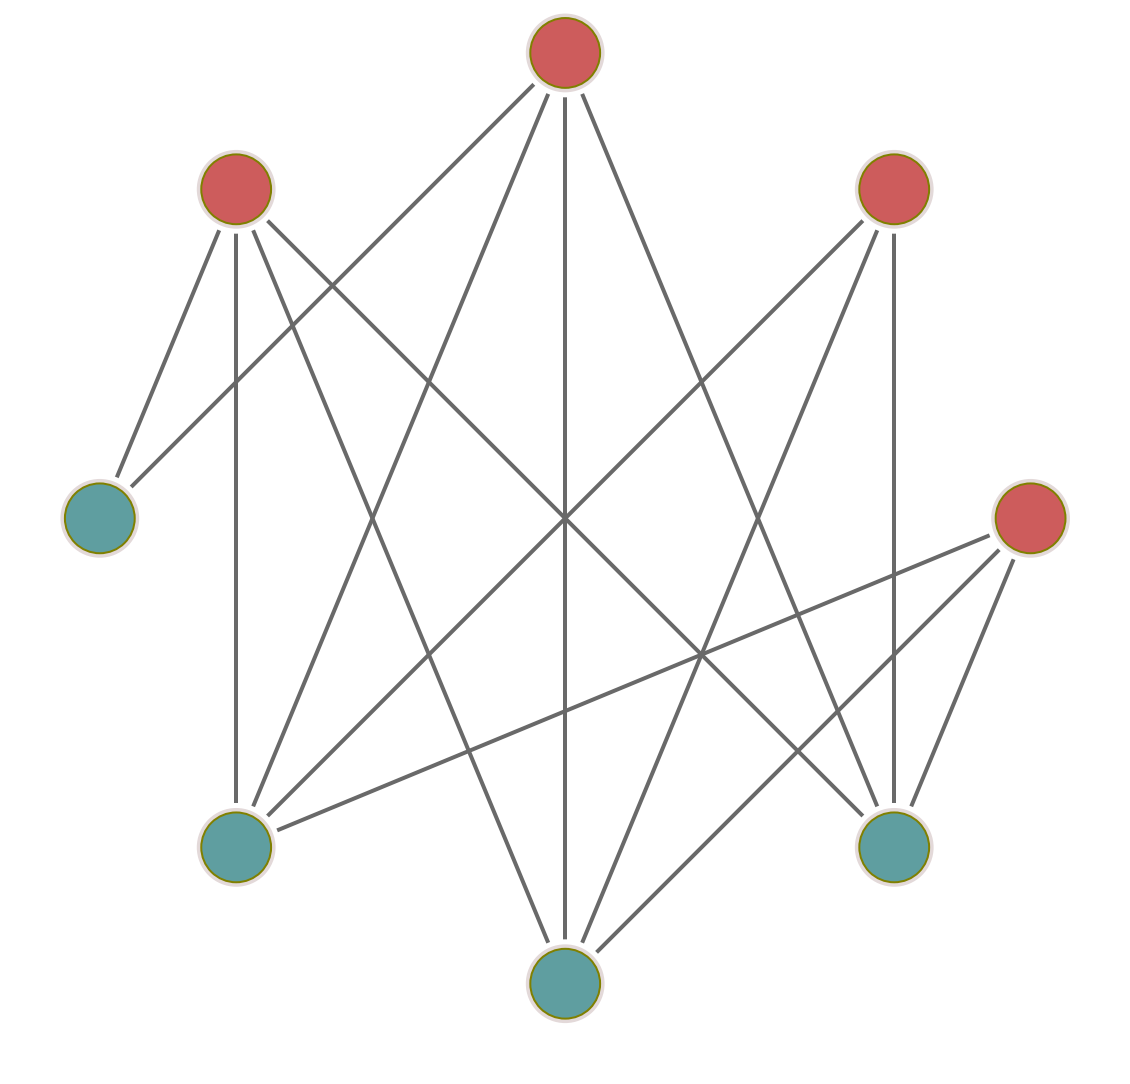

In [17]:
circles = Circles([])
N = 8

for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]
forbidden = [(((1.0, 0.0), (0.707, 0.707)), (0, 1)),
 (((1.0, 0.0), (0.0, 1.0)), (0, 2)),
 (((1.0, 0.0), (-0.707, 0.707)), (0, 3)),
 (((1.0, 0.0), (-1.0, 0.0)), (0, 4)),
 (((0.707, 0.707), (0.0, 1.0)), (1, 2)),
 (((0.707, 0.707), (-0.707, 0.707)), (1, 3)),
 (((0.707, 0.707), (-1.0, 0.0)), (1, 4)),
 (((0.0, 1.0), (-0.707, 0.707)), (2, 3)),
 (((-1.0, 0.0), (-0.707, -0.707)), (4, 5)),
 (((-1.0, 0.0), (-0.0, -1.0)), (4, 6)),
 (((-1.0, 0.0), (0.707, -0.707)), (4, 7)),
 (((-0.707, -0.707), (-0.0, -1.0)), (5, 6)),
 (((-0.707, -0.707), (0.707, -0.707)), (5, 7)),
 (((-0.0, -1.0), (0.707, -0.707)), (6, 7))]
forbidden = [edge[0] for edge in forbidden]

polygons = [[]] #+ polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=4,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in forbidden:
            edge.linewidth = 0
            edge.alpha = 0
        else:
            edge.linewidth = 4
            edge.edgewidth= 1
            edge.alpha=1
            edge.color='dimgray'
            edge.zorder=4
            edge.edgecolor='dimgray'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        circle.size = 0.075#
        circle.fontsize = 35
        if circle.name in [0, 1, 2, 3]:
            circle.color = 'indianred'
        else:
            circle.color = 'cadetblue'
        if circle.name is not None:
            label = ax.annotate(
                "",#r"{}".format(circle.name),
                xy= circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
    loop = "".join((cycle[0]))
ax.figure.savefig(paths.plots / f"Figures/pngs/bipartite_in_sping_glass_N_8.png")


In [ ]:
47 57 46 13 02 03

In [5]:
list(zip(list(combinations(circles.coords, 2)), list(combinations([c.name for c in circles], 2))))

[(((1.0, 0.0), (0.707, 0.707)), (0, 1)),
 (((1.0, 0.0), (0.0, 1.0)), (0, 2)),
 (((1.0, 0.0), (-0.707, 0.707)), (0, 3)),
 (((1.0, 0.0), (-1.0, 0.0)), (0, 4)),
 (((1.0, 0.0), (-0.707, -0.707)), (0, 5)),
 (((1.0, 0.0), (-0.0, -1.0)), (0, 6)),
 (((1.0, 0.0), (0.707, -0.707)), (0, 7)),
 (((0.707, 0.707), (0.0, 1.0)), (1, 2)),
 (((0.707, 0.707), (-0.707, 0.707)), (1, 3)),
 (((0.707, 0.707), (-1.0, 0.0)), (1, 4)),
 (((0.707, 0.707), (-0.707, -0.707)), (1, 5)),
 (((0.707, 0.707), (-0.0, -1.0)), (1, 6)),
 (((0.707, 0.707), (0.707, -0.707)), (1, 7)),
 (((0.0, 1.0), (-0.707, 0.707)), (2, 3)),
 (((0.0, 1.0), (-1.0, 0.0)), (2, 4)),
 (((0.0, 1.0), (-0.707, -0.707)), (2, 5)),
 (((0.0, 1.0), (-0.0, -1.0)), (2, 6)),
 (((0.0, 1.0), (0.707, -0.707)), (2, 7)),
 (((-0.707, 0.707), (-1.0, 0.0)), (3, 4)),
 (((-0.707, 0.707), (-0.707, -0.707)), (3, 5)),
 (((-0.707, 0.707), (-0.0, -1.0)), (3, 6)),
 (((-0.707, 0.707), (0.707, -0.707)), (3, 7)),
 (((-1.0, 0.0), (-0.707, -0.707)), (4, 5)),
 (((-1.0, 0.0), (-0.0, 

[((1.0, 0.0), (0.707, 0.707)),
 ((1.0, 0.0), (0.0, 1.0)),
 ((1.0, 0.0), (-0.707, 0.707)),
 ((1.0, 0.0), (-1.0, 0.0)),
 ((0.707, 0.707), (0.0, 1.0)),
 ((0.707, 0.707), (-0.707, 0.707)),
 ((0.707, 0.707), (-1.0, 0.0)),
 ((0.0, 1.0), (-0.707, 0.707)),
 ((-1.0, 0.0), (-0.707, -0.707)),
 ((-1.0, 0.0), (-0.0, -1.0)),
 ((-1.0, 0.0), (0.707, -0.707)),
 ((-0.707, -0.707), (-0.0, -1.0)),
 ((-0.707, -0.707), (0.707, -0.707)),
 ((-0.0, -1.0), (0.707, -0.707))]